#Purpose

This notebook is to do analysis on the addition user information
## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
from scipy import stats

In [2]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

## Preparing Data

In [3]:
users = pd.read_parquet('../data/LastFM1bKidUsers.gzip.parquet', columns = ['User Id', 'Education Level', 'Age'])
users.head()

User Id Education Level  Age
0  2014225              GS   10
1  2484832              GS    6
2  2635077              GS   11
3  2921901              GS    6
4  3556768              MS   14

In [4]:
usersAdditional = pd.read_parquet('../data/LastFM1bKidUsersAdditional.gzip.parquet')
usersAdditional.fillna(0, inplace = True)
usersAdditional.head(5)

User Id  Novelty Artist Avg Month  Novelty Artist Avg 6Months  \
0  2014225                  0.578795                    0.078465   
1  2484832                  0.133756                    0.059216   
2  2635077                  0.298200                    0.096281   
3  2921901                  0.341162                    0.036058   
4  3556768                  0.466205                    0.024370   

   Novelty Artist Avg Year  Mainstreaminess Avg Month  \
0                 0.873862                   0.178763   
1                 0.192178                   0.134789   
2                 0.444724                   0.148655   
3                 0.451412                   0.106080   
4                 0.634754                   0.077599   

   Mainstreaminess Avg 6Months  Mainstreaminess Avg Year  \
0                     0.873862                  0.300738   
1                     0.276256                  0.129691   
2                     0.571657                  0.179526   
3                     0.464148                  0.047325   
4                     0.706226                  0.059570   

   Mainstreaminess Global  Cnt Listeningevents  Cnt Distinct Tracks  ...  \
0                0.346664                19875                10827  ...   
1                0.264266                18564                 5933  ...   
2                0.463026               128904                36307  ...   
3                0.176432                19991                 9145  ...   
4                0.193772                18796                 8478  ...   

   Relative Le Per Hour14  Relative Le Per Hour15  Relative Le Per Hour16  \
0                  0.0447                  0.0442                  0.0393   
1                  0.0120                  0.0130                  0.0201   
2                  0.0809                  0.0799                  0.0802   
3                  0.0000                  0.0004                  0.0005   
4                  0.0123                  0.0188                  0.0256   

   Relative Le Per Hour17  Relative Le Per Hour18  Relative Le Per Hour19  \
0                  0.0491                  0.0481                  0.0420   
1                  0.0389                  0.0533                  0.0609   
2                  0.0702                  0.0629                  0.0570   
3                  0.0031                  0.0162                  0.0651   
4                  0.0309                  0.0380                  0.0429   

   Relative Le Per Hour20  Relative Le Per Hour21  Relative Le Per Hour22  \
0                  0.0397                  0.0377                  0.0491   
1                  0.0617                  0.0608                  0.0618   
2                  0.0327                  0.0203                  0.0184   
3                  0.0927                  0.0736                  0.0735   
4                  0.0461                  0.0521                  0.0537   

   Relative Le Per Hour23  
0                  0.0487  
1                  0.0650  
2                  0.0179  
3                  0.0919  
4                  0.0513  

[5 rows x 43 columns]

In [5]:
data = users.merge(usersAdditional, on = 'User Id')
data

User Id Education Level  Age  Novelty Artist Avg Month  \
0      2014225              GS   10                  0.578795   
1      2484832              GS    6                  0.133756   
2      2635077              GS   11                  0.298200   
3      2921901              GS    6                  0.341162   
4      3556768              MS   14                  0.466205   
...        ...             ...  ...                       ...   
3411  50072414              MS   14                  0.250000   
3412  50073544              HS   17                  0.444444   
3413  50074162              HS   16                  0.187500   
3414  50164546              HS   17                  0.000000   
3415  50967444              HS   16                  0.263945   

      Novelty Artist Avg 6Months  Novelty Artist Avg Year  \
0                       0.078465                 0.873862   
1                       0.059216                 0.192178   
2                       0.096281                 0.444724   
3                       0.036058                 0.451412   
4                       0.024370                 0.634754   
...                          ...                      ...   
3411                    0.012021                 0.000000   
3412                    0.033566                 0.500000   
3413                    0.025135                 0.000000   
3414                    0.000000                 0.000000   
3415                    0.059712                 0.512946   

      Mainstreaminess Avg Month  Mainstreaminess Avg 6Months  \
0                      0.178763                     0.873862   
1                      0.134789                     0.276256   
2                      0.148655                     0.571657   
3                      0.106080                     0.464148   
4                      0.077599                     0.706226   
...                         ...                          ...   
3411                   0.003672                     0.000000   
3412                   0.000000                     0.000000   
3413                   0.079494                     0.000000   
3414                   0.040971                     0.000000   
3415                   0.115332                     0.701197   

      Mainstreaminess Avg Year  Mainstreaminess Global  ...  \
0                     0.300738                0.346664  ...   
1                     0.129691                0.264266  ...   
2                     0.179526                0.463026  ...   
3                     0.047325                0.176432  ...   
4                     0.059570                0.193772  ...   
...                        ...                     ...  ...   
3411                  0.040588                0.037904  ...   
3412                  0.057404                0.059479  ...   
3413                  0.077119                0.076778  ...   
3414                  0.041712                0.041219  ...   
3415                  0.089394                0.247454  ...   

      Relative Le Per Hour14  Relative Le Per Hour15  Relative Le Per Hour16  \
0                     0.0447                  0.0442                  0.0393   
1                     0.0120                  0.0130                  0.0201   
2                     0.0809                  0.0799                  0.0802   
3                     0.0000                  0.0004                  0.0005   
4                     0.0123                  0.0188                  0.0256   
...                      ...                     ...                     ...   
3411                  0.0000                  0.0000                  0.0000   
3412                  0.0000                  0.0000                  0.0000   
3413                  0.0000                  0.0000                  0.0000   
3414                  0.0000                  0.1059                  0.1647   
3415                  0.0153                  0.0292                  0.0422   

      

## Graphs

### By Education Level

#### Significant

GS -> MS: Ttest_indResult(statistic=4.409933677831602, pvalue=1.3926482212928291e-05)
MS -> HS: Ttest_indResult(statistic=-4.6024336338294995, pvalue=4.330480481351724e-06)


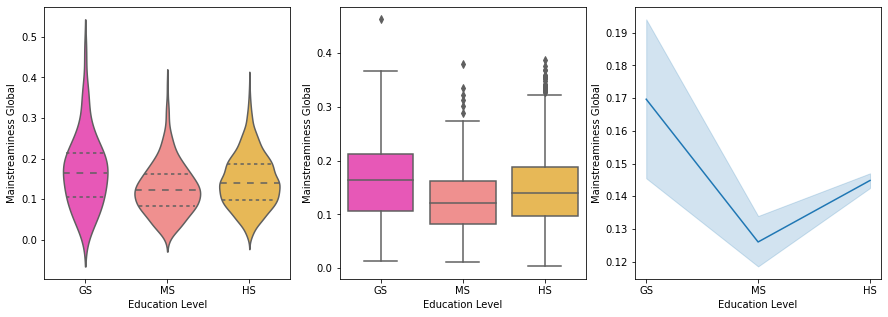

GS -> MS: Ttest_indResult(statistic=4.7843662758634355, pvalue=2.5698000197792264e-06)
MS -> HS: Ttest_indResult(statistic=-2.9782355419425075, pvalue=0.0029198774288979623)


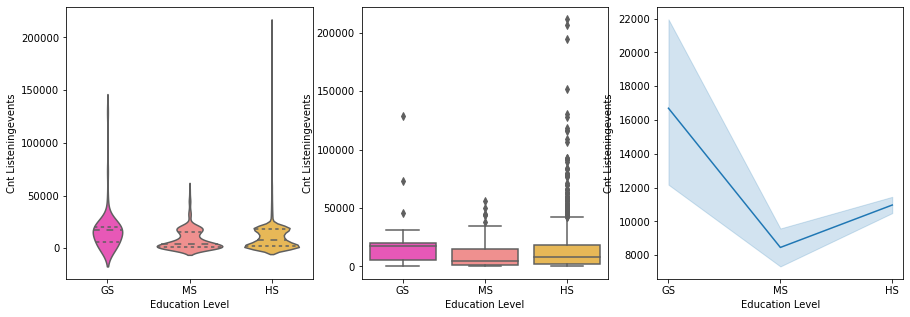

GS -> MS: Ttest_indResult(statistic=7.494722717077286, pvalue=5.910817343389757e-13)
MS -> HS: Ttest_indResult(statistic=-3.665348370011252, pvalue=0.00025082460206291604)


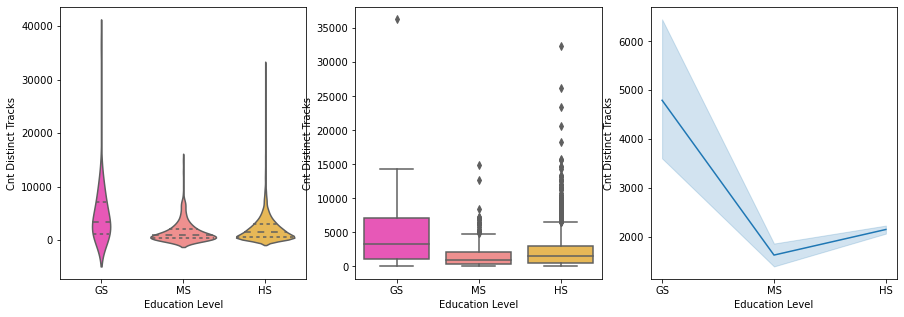

GS -> MS: Ttest_indResult(statistic=7.336958964487413, pvalue=1.6447383821942685e-12)


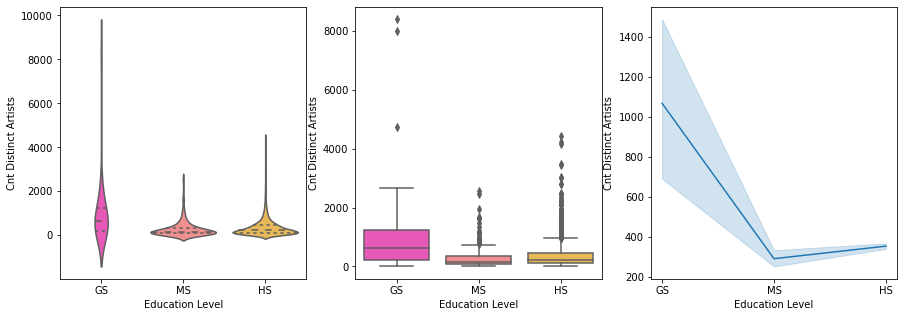

GS -> MS: Ttest_indResult(statistic=2.8544810975004102, pvalue=0.0045775587860830145)


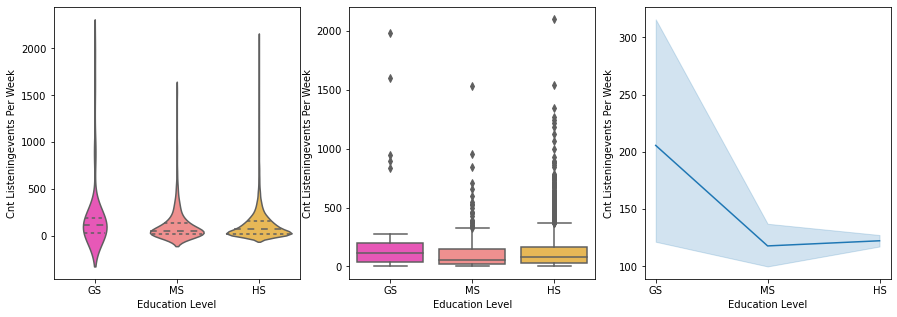

In [6]:
for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    significant = False
    for (x, y) in pairwise(data['Education Level'].cat.categories):
        t = stats.ttest_ind(data[data['Education Level'] == x][column], data[data['Education Level'] == y][column])
        if (t.pvalue <= .005):
            significant = True
            
    if (significant == False):
        continue
    
    for (x, y) in pairwise(data['Education Level'].cat.categories):
        t = stats.ttest_ind(data[data['Education Level'] == x][column], data[data['Education Level'] == y][column])
        if (t.pvalue <= .005):
            print(str(x) + ' -> ' + str(y) + ': ' + str(t))

    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Education Level', y = column, inner = 'quartile', data = data, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Education Level', y = column, data = data, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Education Level', y = column, data = data, ax = axs[2], palette='spring')
    plt.show();

#### All

GS -> MS: Ttest_indResult(statistic=0.48756341771407913, pvalue=0.6261761318953052)
MS -> HS: Ttest_indResult(statistic=2.167565677498541, pvalue=0.030261818925232664)


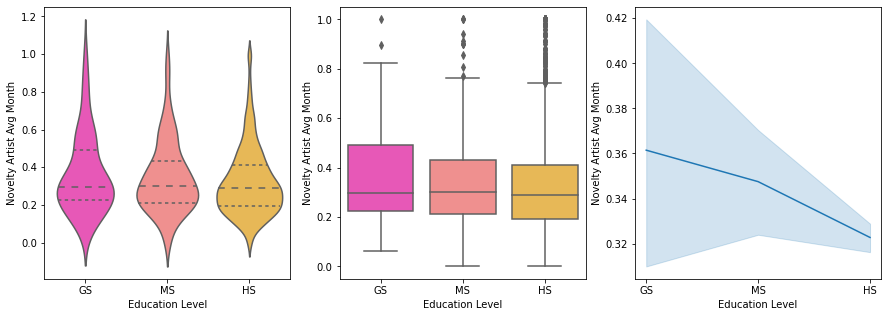

GS -> MS: Ttest_indResult(statistic=0.7777184972395668, pvalue=0.4372806171662743)
MS -> HS: Ttest_indResult(statistic=-1.2852548498007477, pvalue=0.19879190393350918)


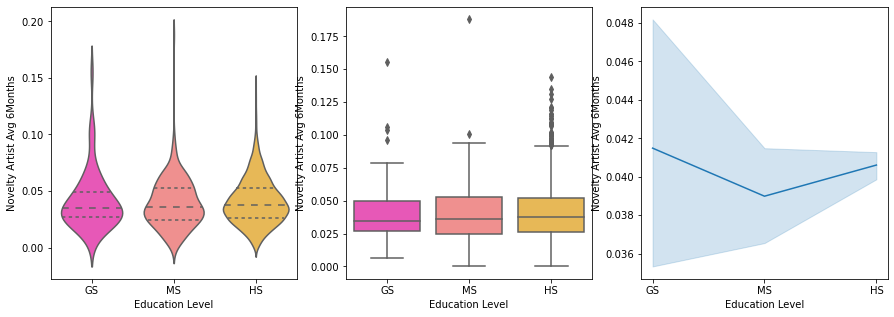

GS -> MS: Ttest_indResult(statistic=0.5790783180674107, pvalue=0.5629231809929592)
MS -> HS: Ttest_indResult(statistic=0.9134899529658829, pvalue=0.36105051621044826)


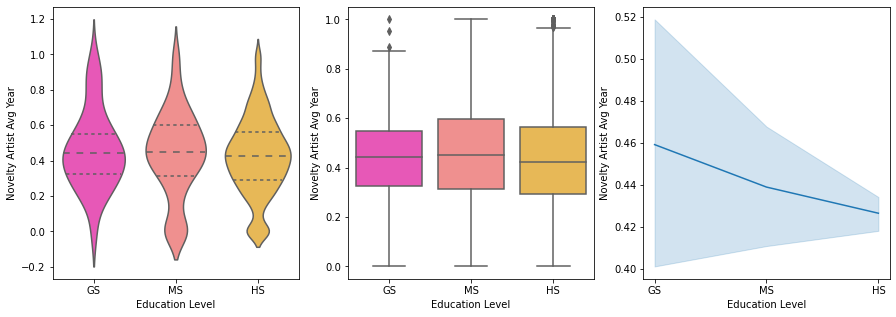

GS -> MS: Ttest_indResult(statistic=1.7821506041472037, pvalue=0.07562494122523848)
MS -> HS: Ttest_indResult(statistic=-0.34690297753653787, pvalue=0.7286859535575155)


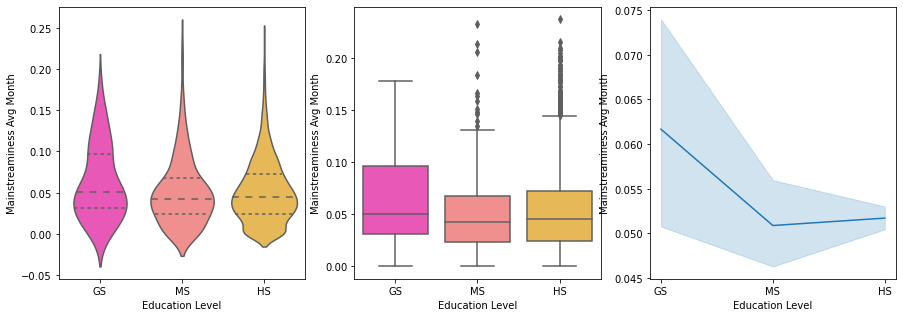

GS -> MS: Ttest_indResult(statistic=1.3480308850802862, pvalue=0.17855384884730807)
MS -> HS: Ttest_indResult(statistic=0.269204227812878, pvalue=0.7877890710709384)


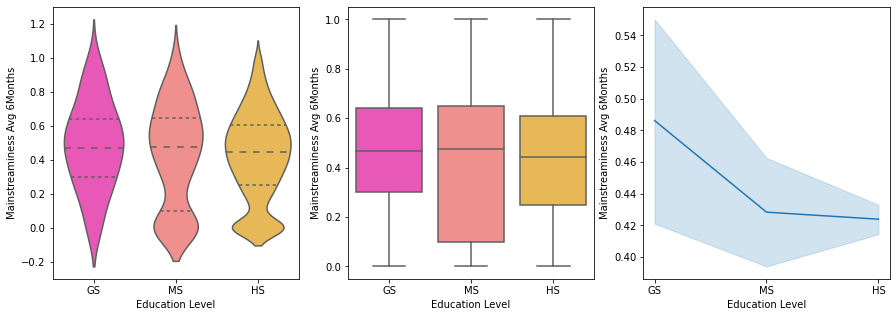

GS -> MS: Ttest_indResult(statistic=2.3209782687704394, pvalue=0.020884253672444817)
MS -> HS: Ttest_indResult(statistic=-1.5795779775368446, pvalue=0.1142977585447845)


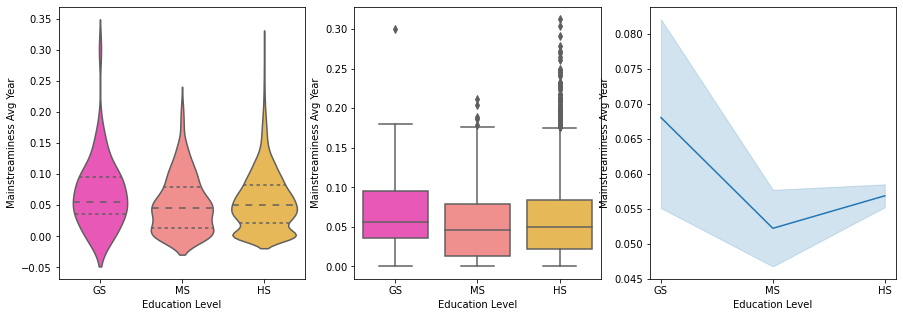

GS -> MS: Ttest_indResult(statistic=4.409933677831602, pvalue=1.3926482212928291e-05)
MS -> HS: Ttest_indResult(statistic=-4.6024336338294995, pvalue=4.330480481351724e-06)


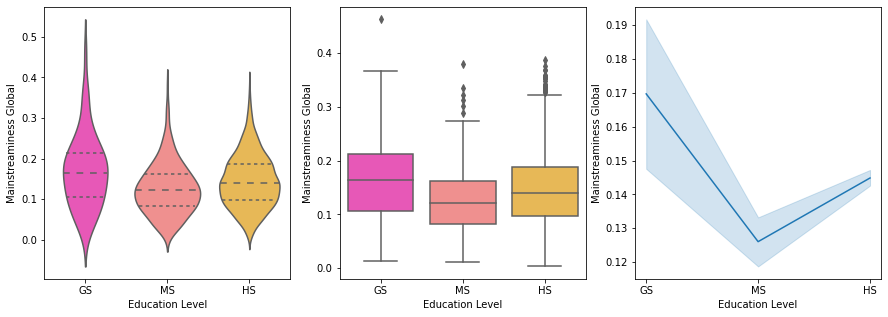

GS -> MS: Ttest_indResult(statistic=4.7843662758634355, pvalue=2.5698000197792264e-06)
MS -> HS: Ttest_indResult(statistic=-2.9782355419425075, pvalue=0.0029198774288979623)


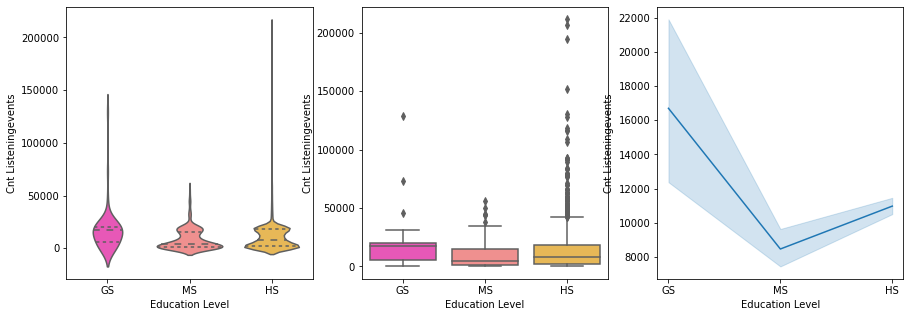

GS -> MS: Ttest_indResult(statistic=7.494722717077286, pvalue=5.910817343389757e-13)
MS -> HS: Ttest_indResult(statistic=-3.665348370011252, pvalue=0.00025082460206291604)


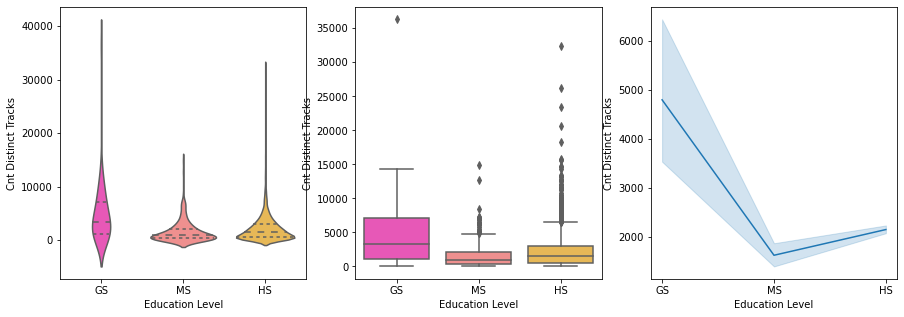

GS -> MS: Ttest_indResult(statistic=7.336958964487413, pvalue=1.6447383821942685e-12)
MS -> HS: Ttest_indResult(statistic=-2.6140075283883166, pvalue=0.008988682402405168)


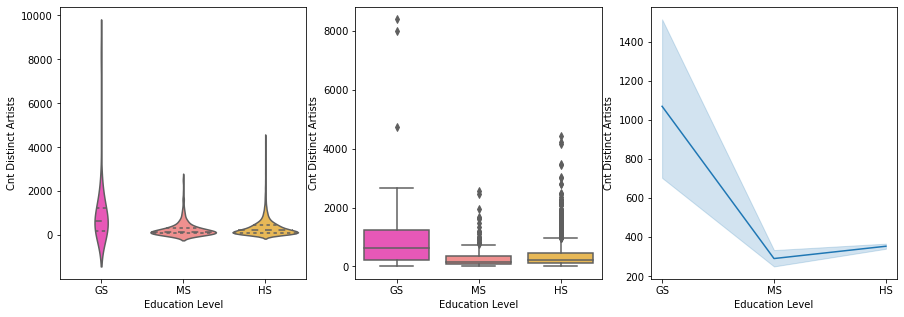

GS -> MS: Ttest_indResult(statistic=2.8544810975004102, pvalue=0.0045775587860830145)
MS -> HS: Ttest_indResult(statistic=-0.48677478184962825, pvalue=0.6264497220590697)


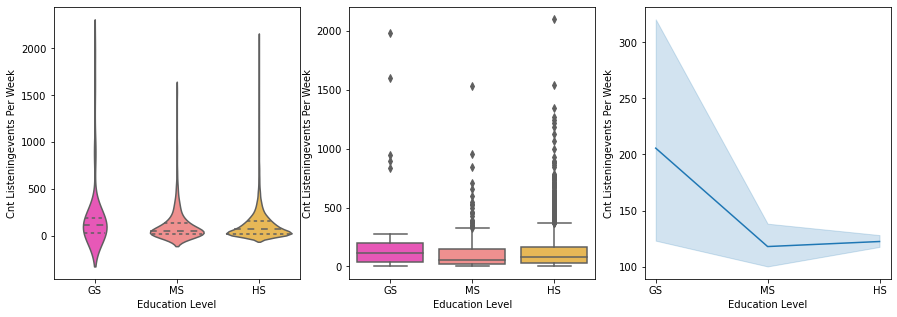

GS -> MS: Ttest_indResult(statistic=-1.4998037367890673, pvalue=0.13460147055852786)
MS -> HS: Ttest_indResult(statistic=-0.3846923841114206, pvalue=0.7004897067489938)


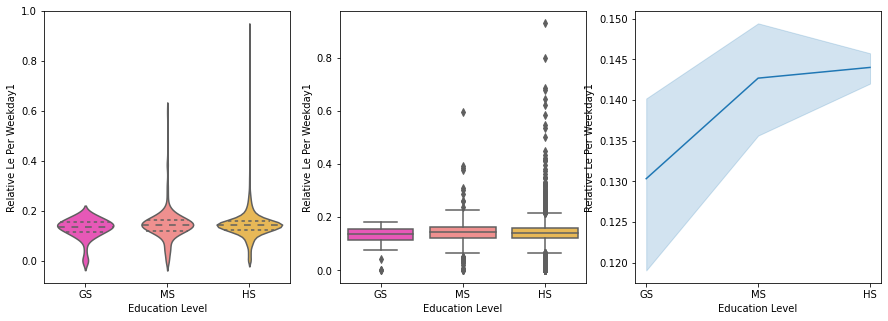

GS -> MS: Ttest_indResult(statistic=0.578462705823724, pvalue=0.5633381413011169)
MS -> HS: Ttest_indResult(statistic=0.72458635640602, pvalue=0.4687563281960082)


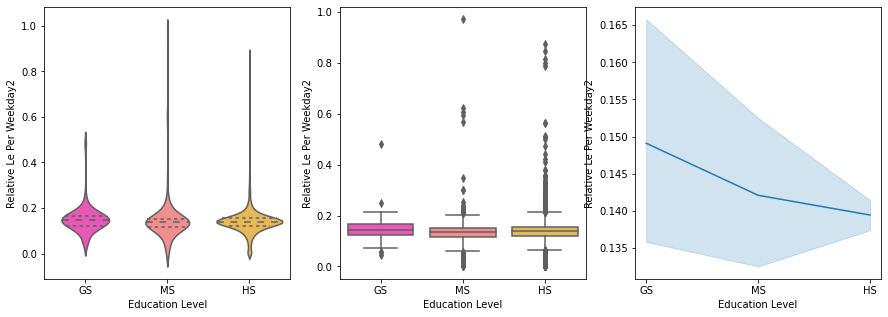

GS -> MS: Ttest_indResult(statistic=1.5667149178932493, pvalue=0.11811982069872344)
MS -> HS: Ttest_indResult(statistic=-1.4530505283646544, pvalue=0.14630319172065218)


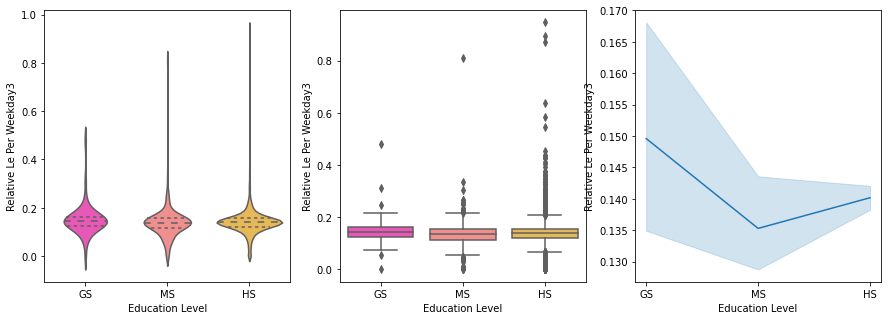

GS -> MS: Ttest_indResult(statistic=-0.25369934985030834, pvalue=0.7998825446359019)
MS -> HS: Ttest_indResult(statistic=-0.7039267129758524, pvalue=0.48152723754561655)


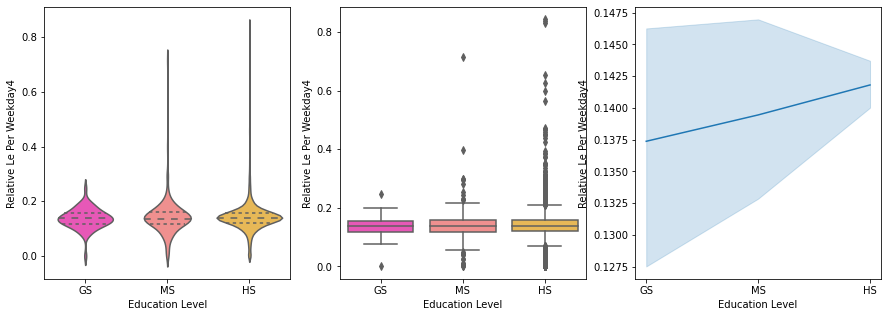

GS -> MS: Ttest_indResult(statistic=0.35906428506683563, pvalue=0.7197718592006652)
MS -> HS: Ttest_indResult(statistic=-0.1462793593183579, pvalue=0.8837096424742539)


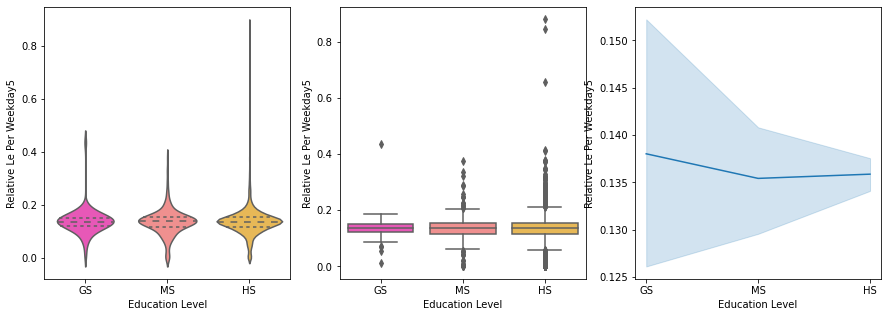

GS -> MS: Ttest_indResult(statistic=-0.04110641938544939, pvalue=0.9672353994478012)
MS -> HS: Ttest_indResult(statistic=2.023537875512161, pvalue=0.043096804044471256)


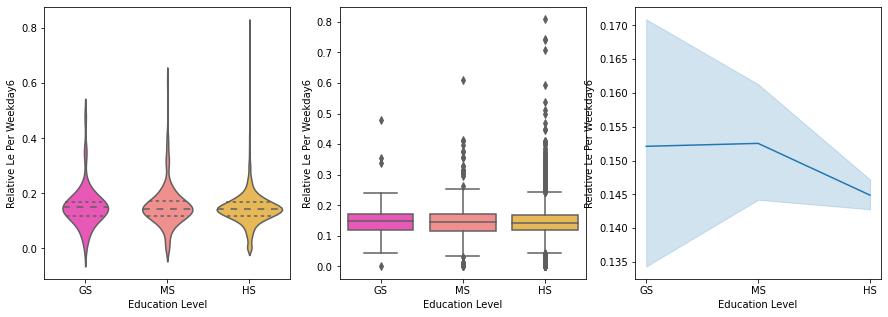

GS -> MS: Ttest_indResult(statistic=-0.8676469736977765, pvalue=0.3862050241905206)
MS -> HS: Ttest_indResult(statistic=-0.3202513716420465, pvalue=0.7487977143922033)


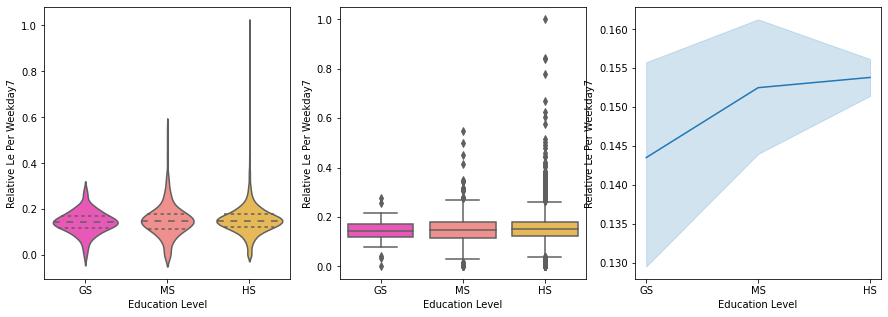

GS -> MS: Ttest_indResult(statistic=0.6555612471045855, pvalue=0.5125537390144729)
MS -> HS: Ttest_indResult(statistic=0.8050015896583532, pvalue=0.4208757716855326)


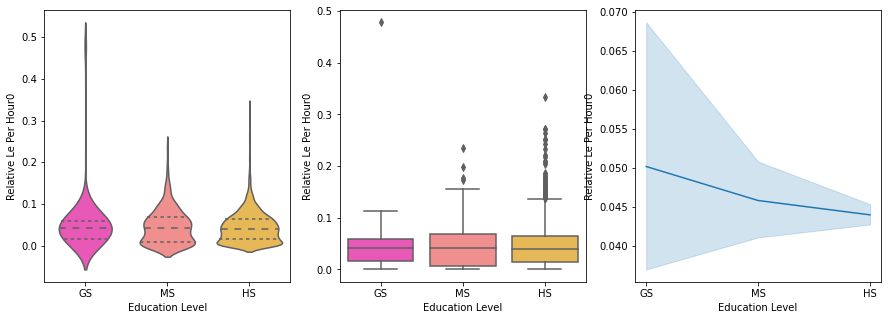

GS -> MS: Ttest_indResult(statistic=-1.11497634249076, pvalue=0.26565504377362403)
MS -> HS: Ttest_indResult(statistic=1.894218545041673, pvalue=0.05828188564079734)


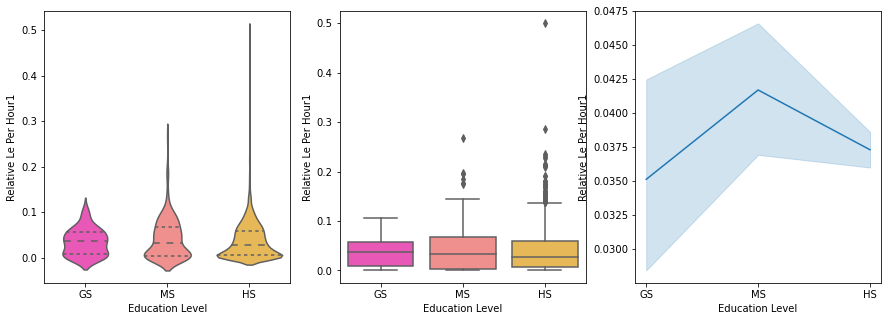

GS -> MS: Ttest_indResult(statistic=-0.9870356862349731, pvalue=0.3243332691795847)
MS -> HS: Ttest_indResult(statistic=1.3635066880997009, pvalue=0.17281430649763913)


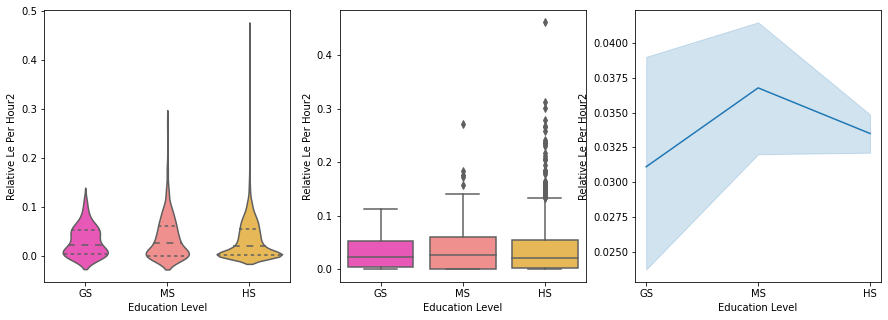

GS -> MS: Ttest_indResult(statistic=-0.6552502298845084, pvalue=0.5127536828679857)
MS -> HS: Ttest_indResult(statistic=1.269901178857115, pvalue=0.20420784948913673)


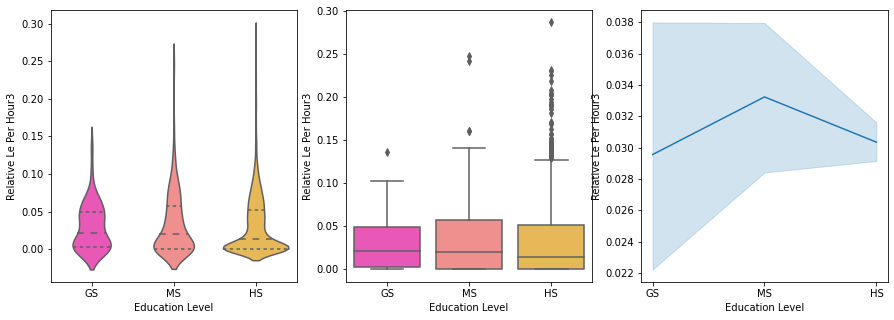

GS -> MS: Ttest_indResult(statistic=-0.22116067174476245, pvalue=0.8251012698674536)
MS -> HS: Ttest_indResult(statistic=0.0746876757546232, pvalue=0.9404676636687659)


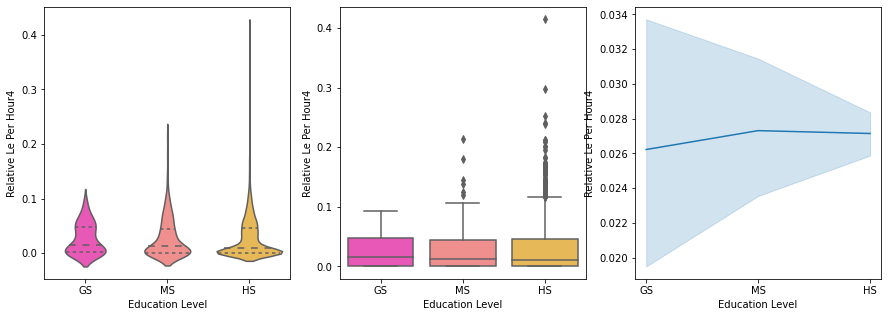

GS -> MS: Ttest_indResult(statistic=0.19216521401127773, pvalue=0.8477285346202822)
MS -> HS: Ttest_indResult(statistic=-0.2795618905590072, pvalue=0.7798308712047827)


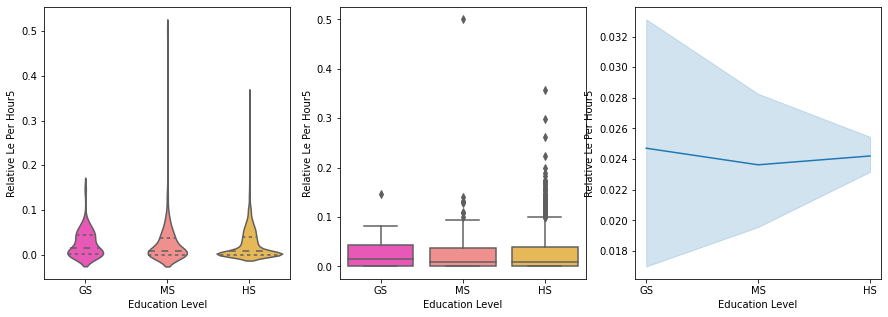

GS -> MS: Ttest_indResult(statistic=1.5564193104859538, pvalue=0.12054699962385405)
MS -> HS: Ttest_indResult(statistic=-1.7776660388030738, pvalue=0.07554922791984828)


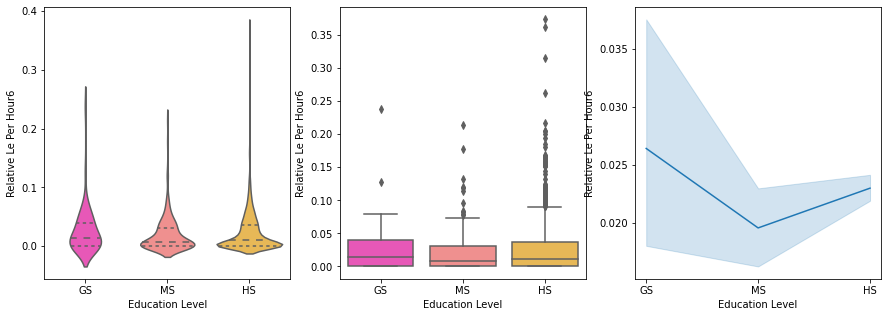

GS -> MS: Ttest_indResult(statistic=0.7510341637804048, pvalue=0.45315620318085525)
MS -> HS: Ttest_indResult(statistic=-2.1444397873893717, pvalue=0.032069256221350095)


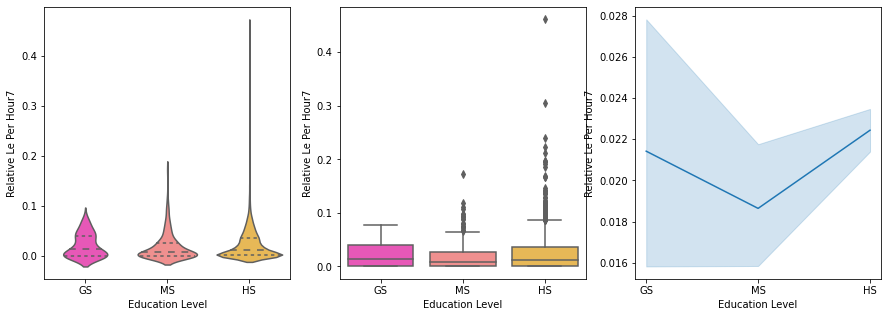

GS -> MS: Ttest_indResult(statistic=1.2656685533344805, pvalue=0.20650608661943384)
MS -> HS: Ttest_indResult(statistic=-0.9987080649792303, pvalue=0.31800811355587705)


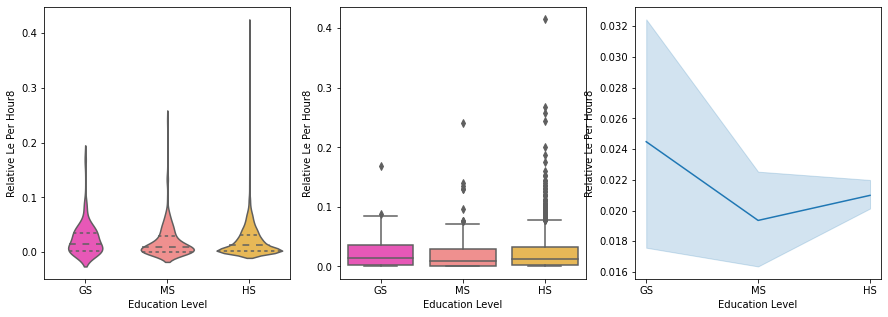

GS -> MS: Ttest_indResult(statistic=0.05443608990203156, pvalue=0.9566199823398166)
MS -> HS: Ttest_indResult(statistic=0.5404700720932856, pvalue=0.5889087497976759)


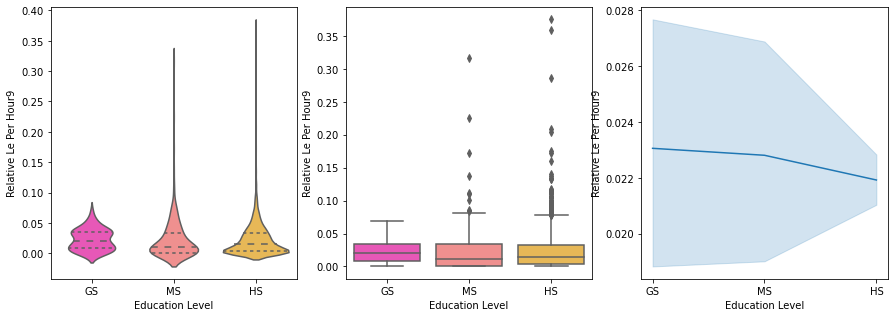

GS -> MS: Ttest_indResult(statistic=0.837331156087728, pvalue=0.40299986061536575)
MS -> HS: Ttest_indResult(statistic=0.5306304118750887, pvalue=0.5957100163814)


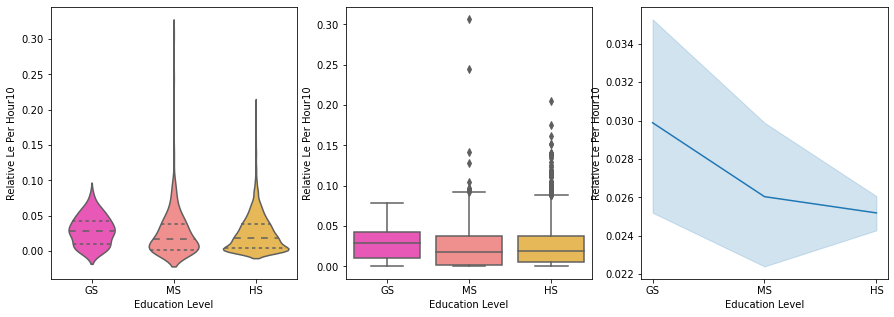

GS -> MS: Ttest_indResult(statistic=1.208000679867443, pvalue=0.22789403379482198)
MS -> HS: Ttest_indResult(statistic=0.0604182424252994, pvalue=0.9518261262632742)


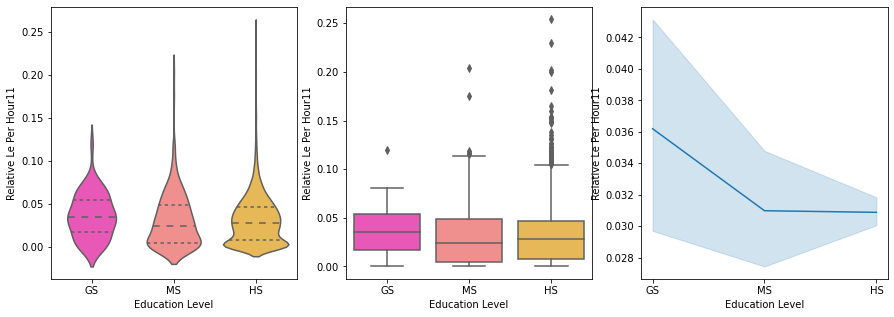

GS -> MS: Ttest_indResult(statistic=1.692432673526974, pvalue=0.09148776561693814)
MS -> HS: Ttest_indResult(statistic=-1.3656126431515192, pvalue=0.17215206652076892)


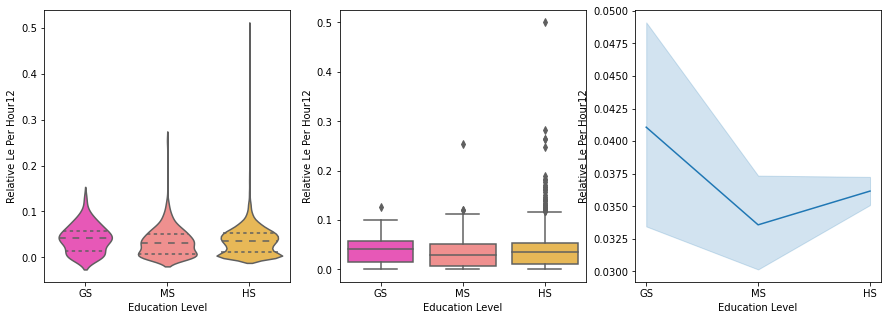

GS -> MS: Ttest_indResult(statistic=1.160787537452443, pvalue=0.2465499098917827)
MS -> HS: Ttest_indResult(statistic=-1.9696567168416768, pvalue=0.048959821979080304)


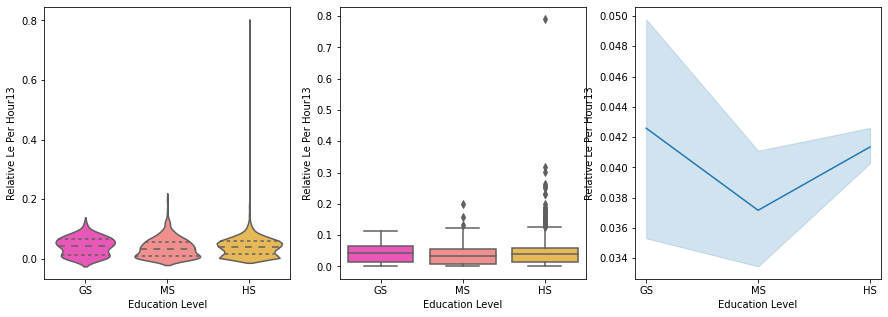

GS -> MS: Ttest_indResult(statistic=0.3039434800272013, pvalue=0.7613585301819351)
MS -> HS: Ttest_indResult(statistic=-0.6308287696545204, pvalue=0.5281954333016627)


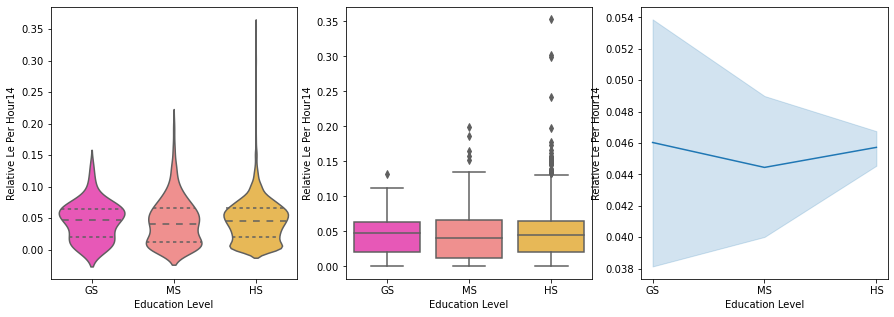

GS -> MS: Ttest_indResult(statistic=-0.1792562824792806, pvalue=0.8578441974758737)
MS -> HS: Ttest_indResult(statistic=-1.0808795689141621, pvalue=0.27982833031827975)


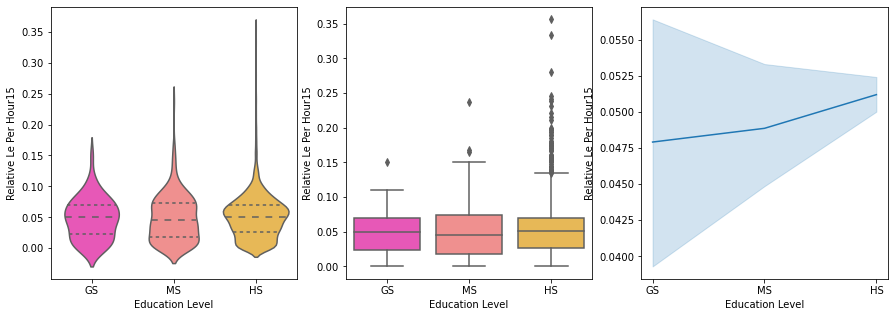

GS -> MS: Ttest_indResult(statistic=-1.079500344621599, pvalue=0.28113673059868527)
MS -> HS: Ttest_indResult(statistic=-0.6955320681858085, pvalue=0.48677006517627686)


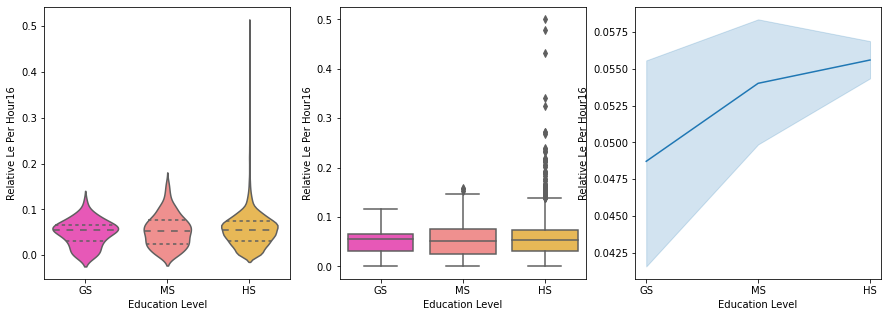

GS -> MS: Ttest_indResult(statistic=-0.42956722798239283, pvalue=0.6677849971881)
MS -> HS: Ttest_indResult(statistic=-0.28083836332120093, pvalue=0.7788516841201837)


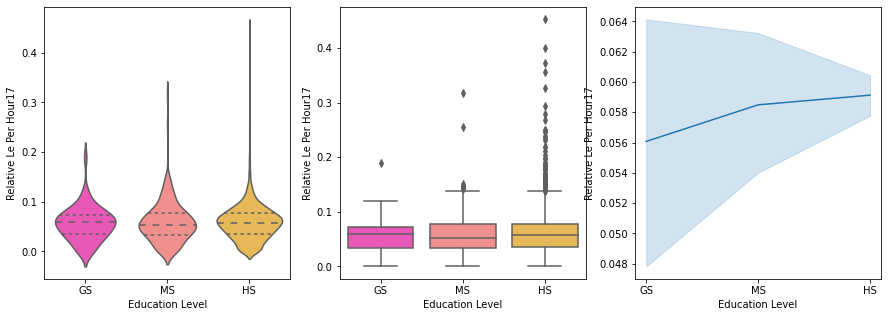

GS -> MS: Ttest_indResult(statistic=-1.2106486583709706, pvalue=0.2268784665399133)
MS -> HS: Ttest_indResult(statistic=0.9005278924506978, pvalue=0.36790398482695164)


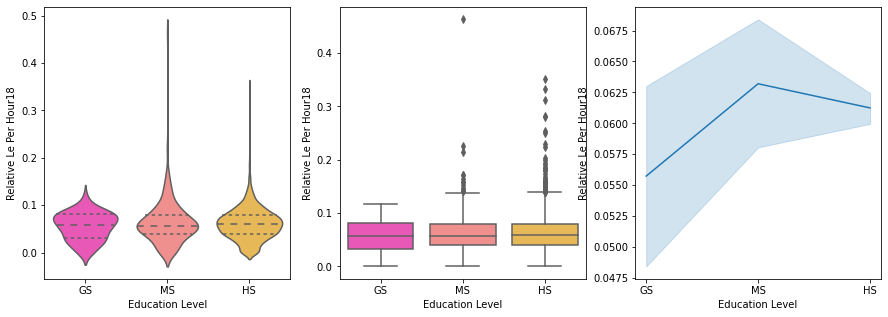

GS -> MS: Ttest_indResult(statistic=-0.4486498763987212, pvalue=0.6539725876159668)
MS -> HS: Ttest_indResult(statistic=1.7875357787742086, pvalue=0.07394111409594031)


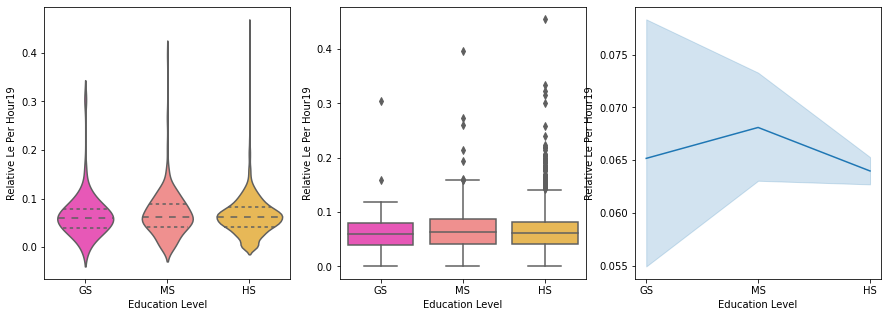

GS -> MS: Ttest_indResult(statistic=-0.5992016097210532, pvalue=0.5494410468884412)
MS -> HS: Ttest_indResult(statistic=0.7353054399542961, pvalue=0.462204861925799)


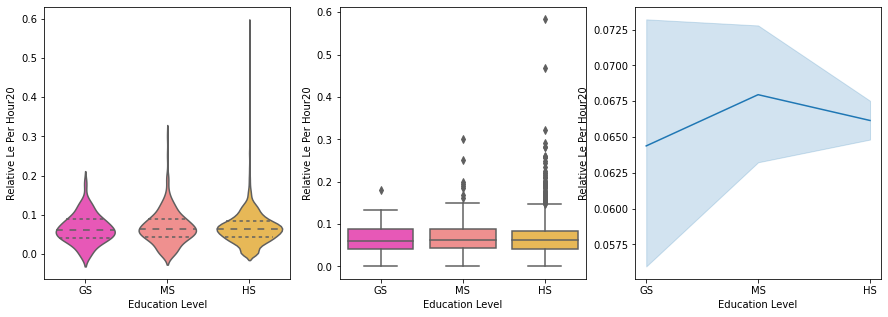

GS -> MS: Ttest_indResult(statistic=0.01825706982860718, pvalue=0.985444579247526)
MS -> HS: Ttest_indResult(statistic=0.5150006446375608, pvalue=0.6065864766789313)


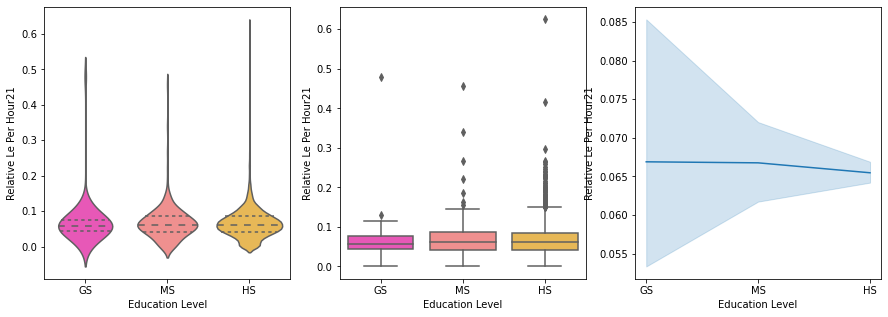

GS -> MS: Ttest_indResult(statistic=-0.7533038464879859, pvalue=0.4517932877019064)
MS -> HS: Ttest_indResult(statistic=-0.2460185904624611, pvalue=0.8056828819339416)


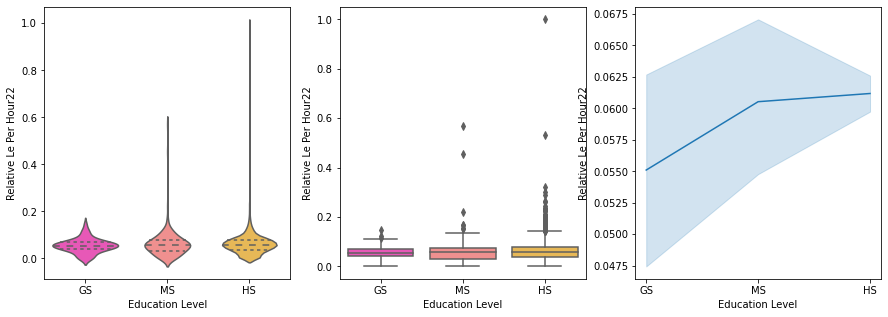

GS -> MS: Ttest_indResult(statistic=0.1592184434077282, pvalue=0.8735921511050713)
MS -> HS: Ttest_indResult(statistic=-0.40405732254904947, pvalue=0.6861963053779048)


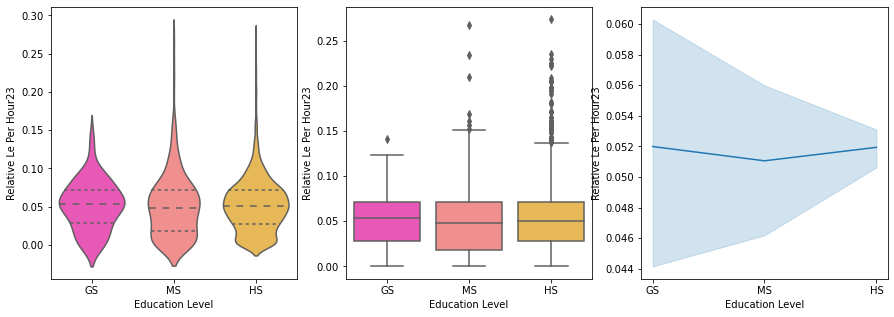

In [7]:
for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    for (x, y) in pairwise(data['Education Level'].cat.categories):
        t = stats.ttest_ind(data[data['Education Level'] == x][column], data[data['Education Level'] == y][column])
        print(str(x) + ' -> ' + str(y) + ': ' + str(t))

    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Education Level', y = column, inner = 'quartile', data = data, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Education Level', y = column, data = data, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Education Level', y = column, data = data, ax = axs[2], palette='spring')
    plt.show();

### By Age

#### Significant

15 -> 16: Ttest_indResult(statistic=-2.943770730037559, pvalue=0.0032944732635738984)


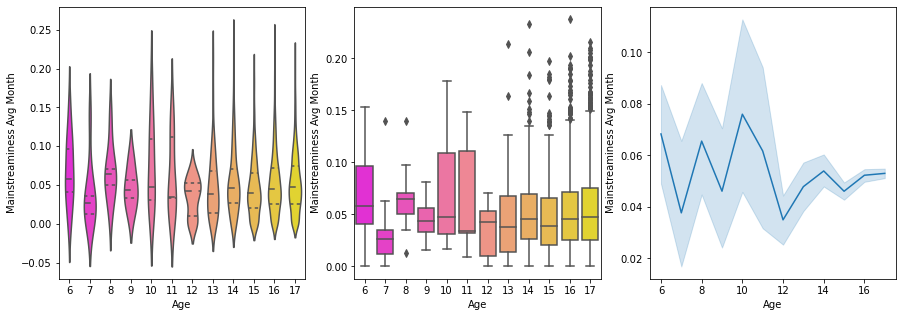

16 -> 17: Ttest_indResult(statistic=-3.0208776441378498, pvalue=0.002545149136042947)


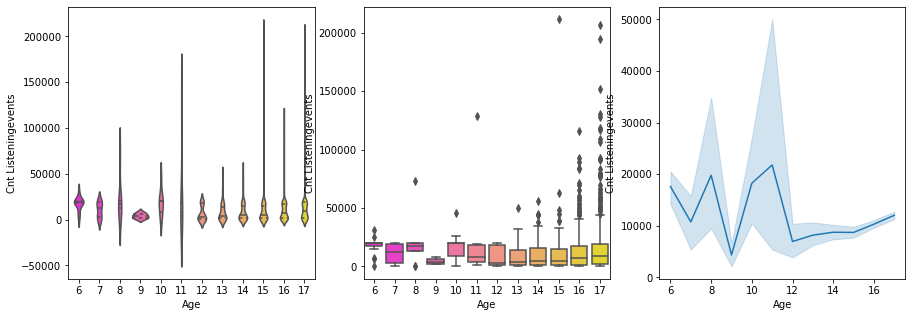

16 -> 17: Ttest_indResult(statistic=-4.386196696774345, pvalue=1.1997382896129403e-05)


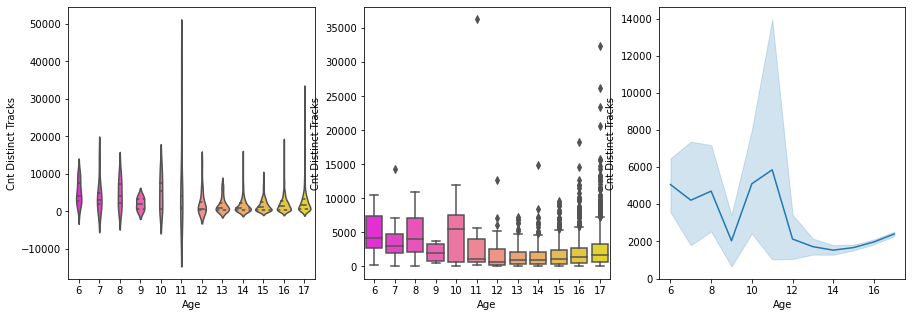

16 -> 17: Ttest_indResult(statistic=-3.7645293708573697, pvalue=0.0001705833968140109)


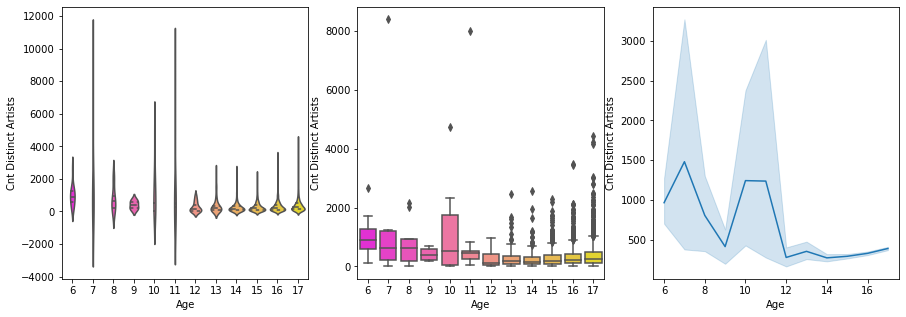

16 -> 17: Ttest_indResult(statistic=-3.003978894241391, pvalue=0.002690338798946201)


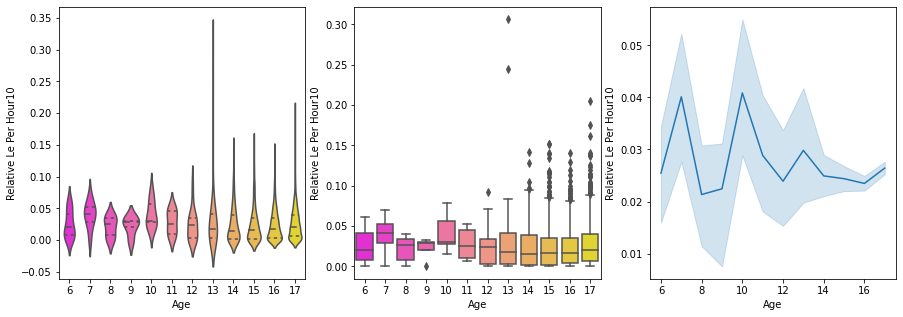

16 -> 17: Ttest_indResult(statistic=-2.9521848649466094, pvalue=0.0031837854050895172)


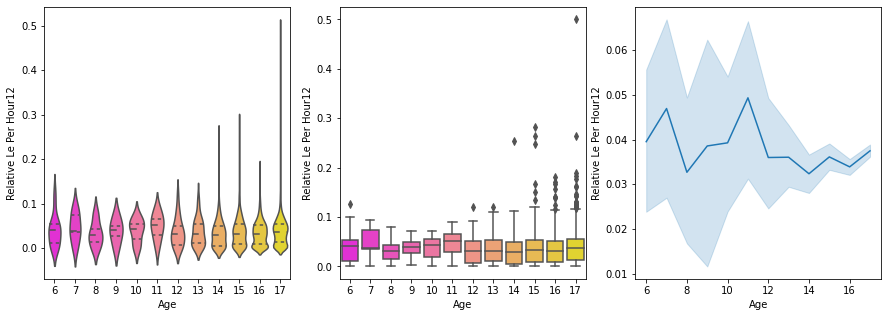

6 -> 7: Ttest_indResult(statistic=3.5667495435802223, pvalue=0.001561451865868092)
16 -> 17: Ttest_indResult(statistic=3.44674742272622, pvalue=0.000576450482900125)


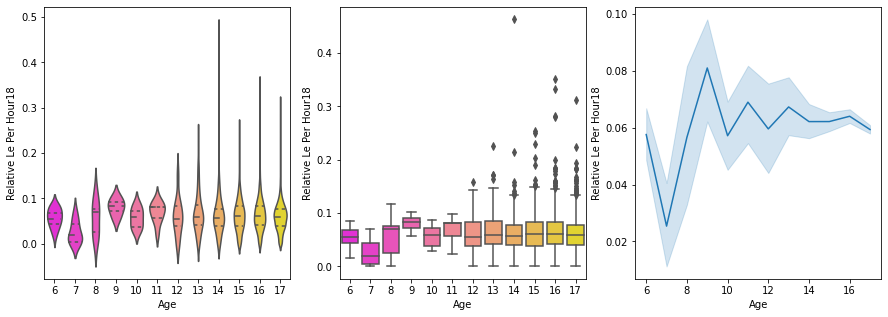

6 -> 7: Ttest_indResult(statistic=3.2406082632254383, pvalue=0.0034805004267178517)


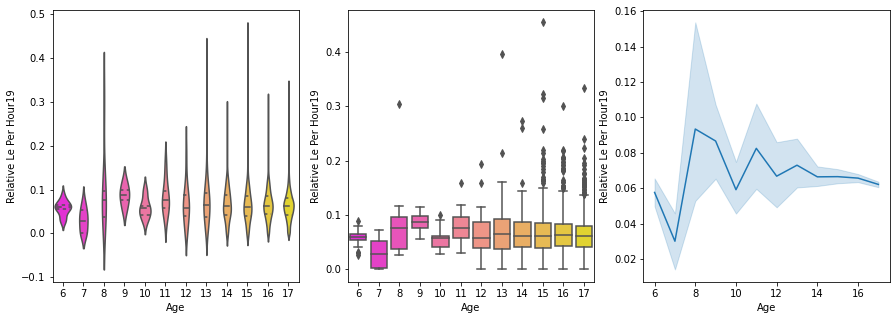

6 -> 7: Ttest_indResult(statistic=3.41644887799476, pvalue=0.002264126832172456)


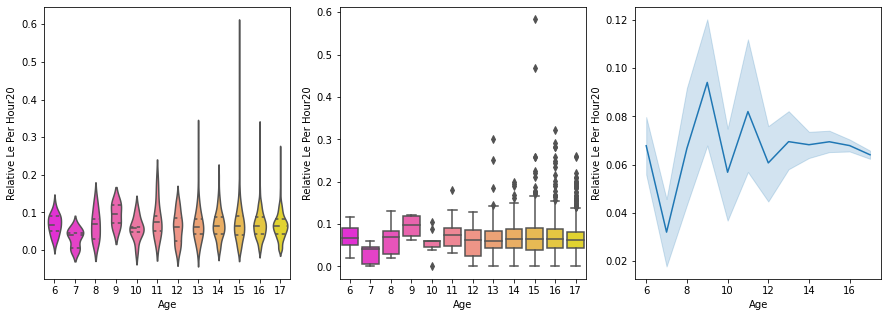

In [8]:
for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    significant = False
    for (x, y) in pairwise(sorted(data['Age'].unique())):
        t = stats.ttest_ind(data[data['Age'] == x][column], data[data['Age'] == y][column])
        if (t.pvalue <= .005):
            significant = True
            
    if (significant == False):
        continue
    
    for (x, y) in pairwise(sorted(data['Age'].unique())):
        t = stats.ttest_ind(data[data['Age'] == x][column], data[data['Age'] == y][column])
        if (t.pvalue <= .005):
            print(str(x) + ' -> ' + str(y) + ': ' + str(t))

    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Age', y = column, inner = 'quartile', data = data, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Age', y = column, data = data, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Age', y = column, data = data, ax = axs[2], palette='spring')
    plt.show();

#### All

6 -> 7: Ttest_indResult(statistic=-1.46510875525576, pvalue=0.1558698127243019)
7 -> 8: Ttest_indResult(statistic=0.7256127299426797, pvalue=0.478556184968974)
8 -> 9: Ttest_indResult(statistic=-0.3917499053795395, pvalue=0.7027258163630229)
9 -> 10: Ttest_indResult(statistic=1.8323381255792432, pvalue=0.09408648985494568)
10 -> 11: Ttest_indResult(statistic=-0.6815998537293282, pvalue=0.5052391527351112)
11 -> 12: Ttest_indResult(statistic=0.017055380984488614, pvalue=0.9865017339216412)
12 -> 13: Ttest_indResult(statistic=-0.9730886563024651, pvalue=0.3330887864542841)
13 -> 14: Ttest_indResult(statistic=0.7326879855832664, pvalue=0.4644190705662895)
14 -> 15: Ttest_indResult(statistic=0.6277492489100367, pvalue=0.5303789628810935)
15 -> 16: Ttest_indResult(statistic=1.4441689495848613, pvalue=0.14890944293941966)
16 -> 17: Ttest_indResult(statistic=-0.09769864098478152, pvalue=0.9221791777875373)


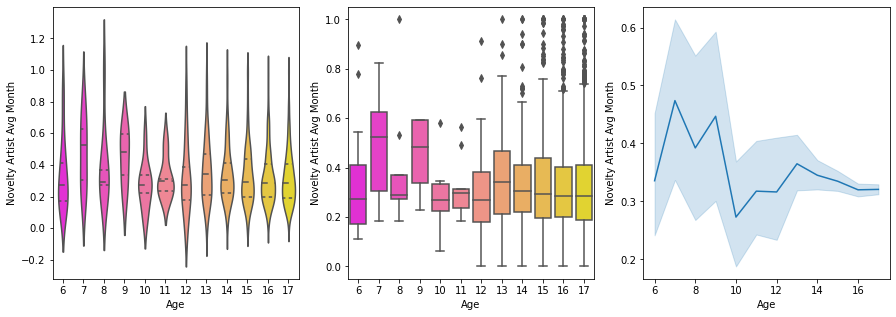

6 -> 7: Ttest_indResult(statistic=1.0708181206574494, pvalue=0.2949022811862343)
7 -> 8: Ttest_indResult(statistic=0.27764259787096385, pvalue=0.784842220206927)
8 -> 9: Ttest_indResult(statistic=1.211649071269645, pvalue=0.25103232108483836)
9 -> 10: Ttest_indResult(statistic=-1.1691836216576532, pvalue=0.26704170725356285)
10 -> 11: Ttest_indResult(statistic=0.050398393318624106, pvalue=0.960428728819864)
11 -> 12: Ttest_indResult(statistic=0.8186262411693743, pvalue=0.41924840791499696)
12 -> 13: Ttest_indResult(statistic=-0.30917742772605544, pvalue=0.7578933479808687)
13 -> 14: Ttest_indResult(statistic=-1.9144643492338964, pvalue=0.05667554041244797)
14 -> 15: Ttest_indResult(statistic=0.42867232126405685, pvalue=0.668297463871204)
15 -> 16: Ttest_indResult(statistic=0.24934608602811104, pvalue=0.8031287206441183)
16 -> 17: Ttest_indResult(statistic=-1.4287956956267682, pvalue=0.15318392261764718)


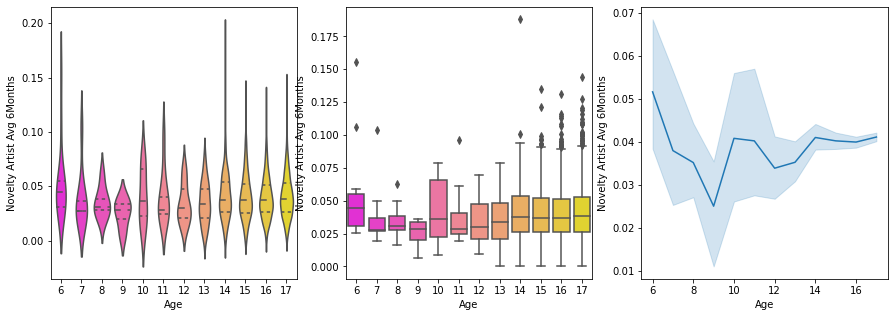

6 -> 7: Ttest_indResult(statistic=-1.136452877121519, pvalue=0.2669877775357999)
7 -> 8: Ttest_indResult(statistic=0.7629982635488552, pvalue=0.45656748350770726)
8 -> 9: Ttest_indResult(statistic=-1.067354169678727, pvalue=0.3086771511856822)
9 -> 10: Ttest_indResult(statistic=1.1956310930792096, pvalue=0.2569792872124232)
10 -> 11: Ttest_indResult(statistic=-0.2025241292087369, pvalue=0.8420598505561195)
11 -> 12: Ttest_indResult(statistic=0.08617779797896978, pvalue=0.9318792983290043)
12 -> 13: Ttest_indResult(statistic=0.45414986106476346, pvalue=0.6508023321824972)
13 -> 14: Ttest_indResult(statistic=-0.6220215696691423, pvalue=0.534481265207432)
14 -> 15: Ttest_indResult(statistic=0.4877495838389417, pvalue=0.6258844418463618)
15 -> 16: Ttest_indResult(statistic=0.7106762459111413, pvalue=0.47740020658378235)
16 -> 17: Ttest_indResult(statistic=-0.030753859081034184, pvalue=0.9754682149979913)


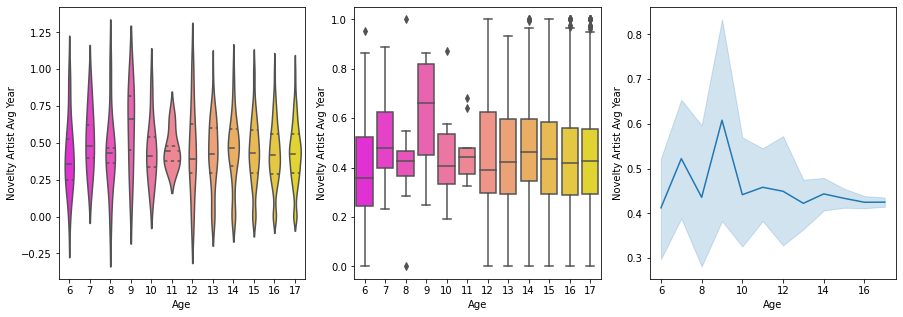

6 -> 7: Ttest_indResult(statistic=1.72493437663575, pvalue=0.09739634342029696)
7 -> 8: Ttest_indResult(statistic=-1.4949586868896356, pvalue=0.154386376011017)
8 -> 9: Ttest_indResult(statistic=0.9465092759394984, pvalue=0.3642175230147213)
9 -> 10: Ttest_indResult(statistic=-1.0201706872227916, pvalue=0.32956062052128277)
10 -> 11: Ttest_indResult(statistic=0.5772529290736939, pvalue=0.5718025369498039)
11 -> 12: Ttest_indResult(statistic=2.085023139671094, pvalue=0.04539417673060034)
12 -> 13: Ttest_indResult(statistic=-1.4533125167037073, pvalue=0.1495769322448788)
13 -> 14: Ttest_indResult(statistic=-1.0257530416169087, pvalue=0.3059762586217851)
14 -> 15: Ttest_indResult(statistic=2.3997473141242494, pvalue=0.016674378427861986)
15 -> 16: Ttest_indResult(statistic=-2.943770730037559, pvalue=0.0032944732635738984)
16 -> 17: Ttest_indResult(statistic=-0.457993448318199, pvalue=0.6469956879471136)


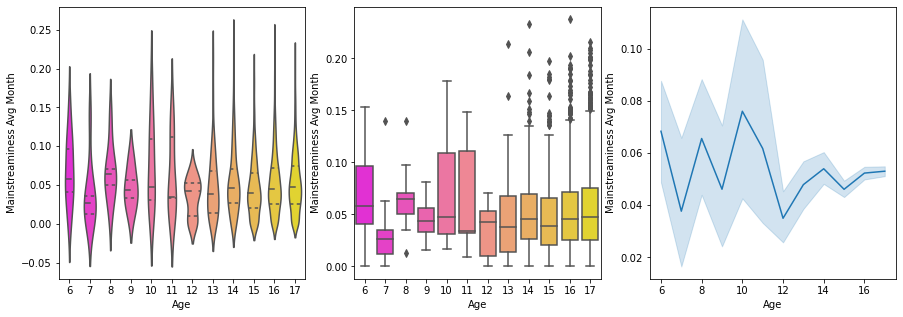

6 -> 7: Ttest_indResult(statistic=-0.6654177015901562, pvalue=0.512128182390774)
7 -> 8: Ttest_indResult(statistic=-0.007314584878285337, pvalue=0.9942542837235536)
8 -> 9: Ttest_indResult(statistic=-0.0836723603200741, pvalue=0.9348202364294156)
9 -> 10: Ttest_indResult(statistic=0.2806303915326659, pvalue=0.7842017414358613)
10 -> 11: Ttest_indResult(statistic=-0.958584894503512, pvalue=0.35203009052393586)
11 -> 12: Ttest_indResult(statistic=1.5161157867770525, pvalue=0.13962192319379638)
12 -> 13: Ttest_indResult(statistic=-0.3839750440375672, pvalue=0.7018926695609289)
13 -> 14: Ttest_indResult(statistic=-0.1141310997696877, pvalue=0.9092233276340389)
14 -> 15: Ttest_indResult(statistic=0.4680442610999954, pvalue=0.6399029131939395)
15 -> 16: Ttest_indResult(statistic=-0.24691050285805097, pvalue=0.8050127562533749)
16 -> 17: Ttest_indResult(statistic=-0.01885045770975041, pvalue=0.9849618580000823)


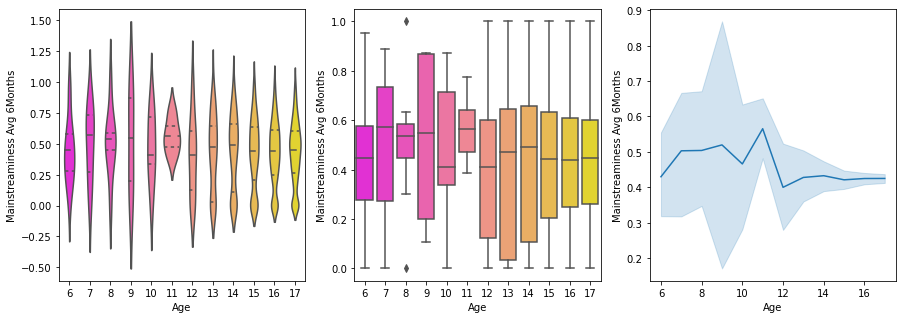

6 -> 7: Ttest_indResult(statistic=0.19347300132064235, pvalue=0.8482166349983984)
7 -> 8: Ttest_indResult(statistic=-1.3100732556356391, pvalue=0.20866873592792715)
8 -> 9: Ttest_indResult(statistic=2.206203939123952, pvalue=0.04954618825495212)
9 -> 10: Ttest_indResult(statistic=-0.8858534741440406, pvalue=0.3946498776118459)
10 -> 11: Ttest_indResult(statistic=0.12665408846948664, pvalue=0.9007921774022033)
11 -> 12: Ttest_indResult(statistic=2.0149302774232543, pvalue=0.05265505313709142)
12 -> 13: Ttest_indResult(statistic=-1.1605500734872123, pvalue=0.24886048300876187)
13 -> 14: Ttest_indResult(statistic=-1.4035370099842561, pvalue=0.16166858608160045)
14 -> 15: Ttest_indResult(statistic=-0.49340309121855325, pvalue=0.6218871067778217)
15 -> 16: Ttest_indResult(statistic=0.25255567587648153, pvalue=0.8006477049436431)
16 -> 17: Ttest_indResult(statistic=0.8778773127968507, pvalue=0.3800919809249623)


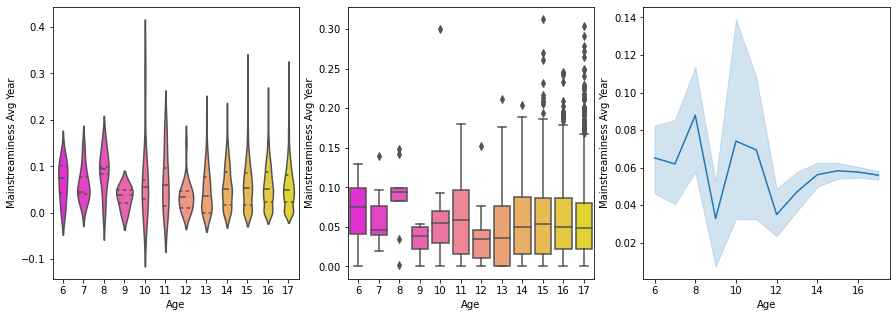

6 -> 7: Ttest_indResult(statistic=1.9216294368475684, pvalue=0.06660442781131928)
7 -> 8: Ttest_indResult(statistic=-0.7833513337385835, pvalue=0.4448623425312571)
8 -> 9: Ttest_indResult(statistic=1.2670409840341745, pvalue=0.23130924067759578)
9 -> 10: Ttest_indResult(statistic=-1.0816733385349906, pvalue=0.3025406809998679)
10 -> 11: Ttest_indResult(statistic=0.04403213195438857, pvalue=0.9654236425700846)
11 -> 12: Ttest_indResult(statistic=2.9781073556058018, pvalue=0.005590052580324194)
12 -> 13: Ttest_indResult(statistic=-2.1184941792962655, pvalue=0.03685829743309122)
13 -> 14: Ttest_indResult(statistic=-0.3141682343968589, pvalue=0.7536491374132059)
14 -> 15: Ttest_indResult(statistic=-0.7789602940933152, pvalue=0.4362740929905963)
15 -> 16: Ttest_indResult(statistic=-2.5534598419727463, pvalue=0.010768370428834946)
16 -> 17: Ttest_indResult(statistic=-2.2965779874355032, pvalue=0.021722566158858106)


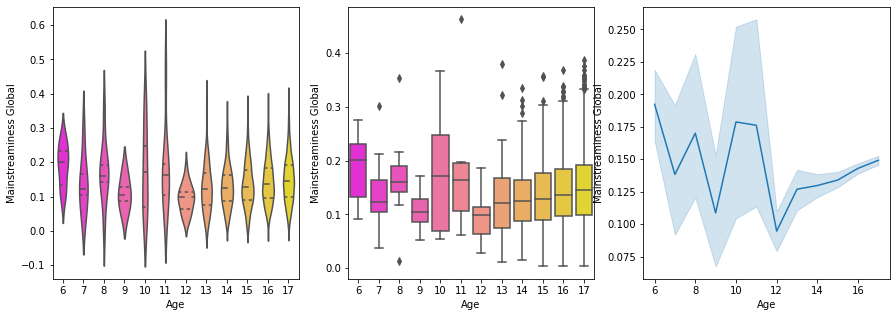

6 -> 7: Ttest_indResult(statistic=2.1654839027718884, pvalue=0.04051121088609273)
7 -> 8: Ttest_indResult(statistic=-1.1739484757903063, pvalue=0.2575943654988205)
8 -> 9: Ttest_indResult(statistic=1.3999404751731894, pvalue=0.18909789413926462)
9 -> 10: Ttest_indResult(statistic=-2.0199807455947676, pvalue=0.06841851081411784)
10 -> 11: Ttest_indResult(statistic=-0.2478060752614832, pvalue=0.8074365910196872)
11 -> 12: Ttest_indResult(statistic=1.73706030613741, pvalue=0.09230481264152642)
12 -> 13: Ttest_indResult(statistic=-0.5709271039246585, pvalue=0.5694563066299332)
13 -> 14: Ttest_indResult(statistic=-0.41047927627045344, pvalue=0.681797743183479)
14 -> 15: Ttest_indResult(statistic=0.036334386911079625, pvalue=0.9710263946319236)
15 -> 16: Ttest_indResult(statistic=-2.389127468715194, pvalue=0.01701677770004383)
16 -> 17: Ttest_indResult(statistic=-3.0208776441378498, pvalue=0.002545149136042947)


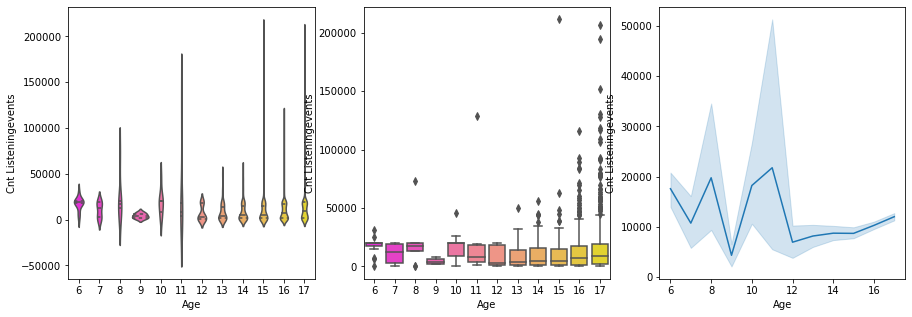

6 -> 7: Ttest_indResult(statistic=0.5659329807901685, pvalue=0.5766931186829236)
7 -> 8: Ttest_indResult(statistic=-0.2527154467978847, pvalue=0.8037061321359388)
8 -> 9: Ttest_indResult(statistic=1.3338491672540391, pvalue=0.20921252832152906)
9 -> 10: Ttest_indResult(statistic=-1.2774892715641024, pvalue=0.22773316431971488)
10 -> 11: Ttest_indResult(statistic=-0.18073459096866698, pvalue=0.858845386539115)
11 -> 12: Ttest_indResult(statistic=1.481320216902199, pvalue=0.14861511296072)
12 -> 13: Ttest_indResult(statistic=0.7588597582498746, pvalue=0.44989757177100964)
13 -> 14: Ttest_indResult(statistic=0.7077576170224037, pvalue=0.4797396391721237)
14 -> 15: Ttest_indResult(statistic=-0.9100118949293031, pvalue=0.36313867743901207)
15 -> 16: Ttest_indResult(statistic=-2.777472932026343, pvalue=0.005549540655190654)
16 -> 17: Ttest_indResult(statistic=-4.386196696774345, pvalue=1.1997382896129403e-05)


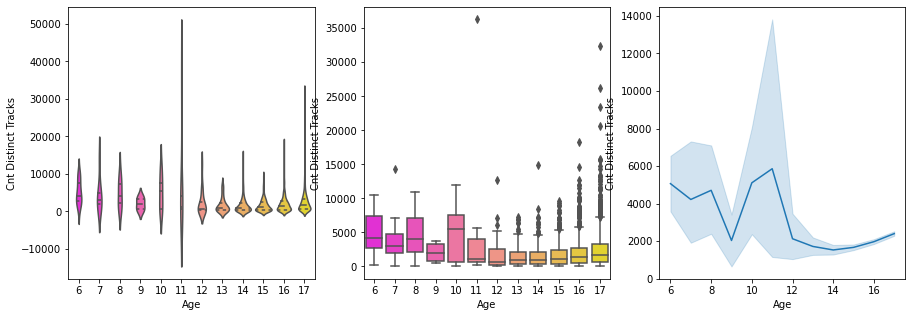

6 -> 7: Ttest_indResult(statistic=-0.779159363324494, pvalue=0.4435014037831575)
7 -> 8: Ttest_indResult(statistic=0.7368956437564328, pvalue=0.47185390132310423)
8 -> 9: Ttest_indResult(statistic=0.9577042567485242, pvalue=0.35878806452681344)
9 -> 10: Ttest_indResult(statistic=-1.0329334244286048, pvalue=0.32381101655512423)
10 -> 11: Ttest_indResult(statistic=0.006027876701426424, pvalue=0.9952649979260484)
11 -> 12: Ttest_indResult(statistic=1.8641826819900928, pvalue=0.07179040604781976)
12 -> 13: Ttest_indResult(statistic=-0.7620795213381147, pvalue=0.4479832575300494)
13 -> 14: Ttest_indResult(statistic=1.5933829832080422, pvalue=0.11230820123845668)
14 -> 15: Ttest_indResult(statistic=-0.7138344456161193, pvalue=0.4755744897685187)
15 -> 16: Ttest_indResult(statistic=-1.9289954363758564, pvalue=0.05392816146176614)
16 -> 17: Ttest_indResult(statistic=-3.7645293708573697, pvalue=0.0001705833968140109)


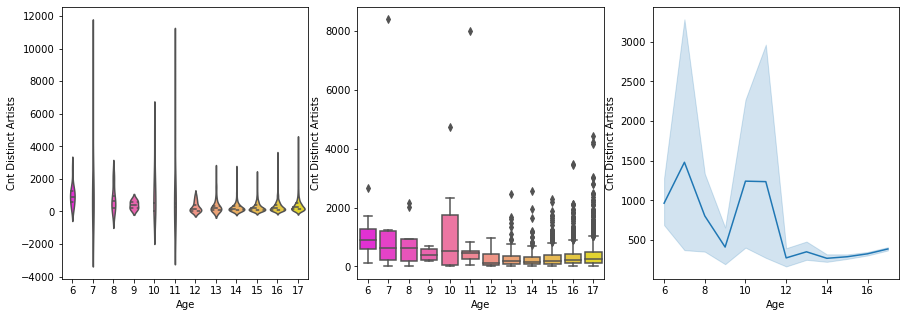

6 -> 7: Ttest_indResult(statistic=0.7673123143861705, pvalue=0.45037910471556464)
7 -> 8: Ttest_indResult(statistic=0.4194449288448635, pvalue=0.6804685806472597)
8 -> 9: Ttest_indResult(statistic=1.1160459506410687, pvalue=0.2881890543111141)
9 -> 10: Ttest_indResult(statistic=-1.1254110380867095, pvalue=0.2843709092330222)
10 -> 11: Ttest_indResult(statistic=1.5205324493156769, pvalue=0.14789189574947026)
11 -> 12: Ttest_indResult(statistic=-0.012231760715818742, pvalue=0.99031909204081)
12 -> 13: Ttest_indResult(statistic=-0.07198138468942149, pvalue=0.9427746909554361)
13 -> 14: Ttest_indResult(statistic=-1.256906123020673, pvalue=0.20993321120023792)
14 -> 15: Ttest_indResult(statistic=1.150947013381227, pvalue=0.25015858100884025)
15 -> 16: Ttest_indResult(statistic=-0.20584101105572394, pvalue=0.8369442615664868)
16 -> 17: Ttest_indResult(statistic=-2.570935393506343, pvalue=0.010197961980576176)


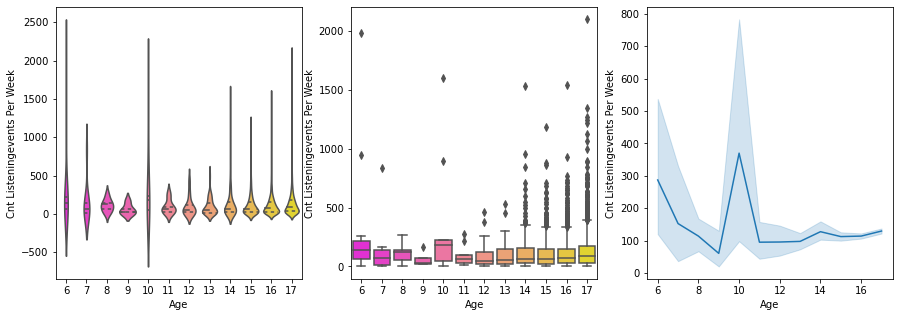

6 -> 7: Ttest_indResult(statistic=0.6790976128286877, pvalue=0.5035730810999076)
7 -> 8: Ttest_indResult(statistic=0.5373166132729347, pvalue=0.5984429170422675)
8 -> 9: Ttest_indResult(statistic=0.7670311904395026, pvalue=0.4592096015744396)
9 -> 10: Ttest_indResult(statistic=-0.5745737784349959, pvalue=0.5771412259896203)
10 -> 11: Ttest_indResult(statistic=-1.262552483017849, pvalue=0.22484210511981031)
11 -> 12: Ttest_indResult(statistic=-0.05153324777490264, pvalue=0.9592312474078072)
12 -> 13: Ttest_indResult(statistic=-0.31203180557495375, pvalue=0.7557301813535076)
13 -> 14: Ttest_indResult(statistic=1.011503956379464, pvalue=0.31273035543241284)
14 -> 15: Ttest_indResult(statistic=-0.5003588104615561, pvalue=0.6169843420462701)
15 -> 16: Ttest_indResult(statistic=-0.37634500250784436, pvalue=0.7067159841072768)
16 -> 17: Ttest_indResult(statistic=0.18976199358378024, pvalue=0.8495105555362192)


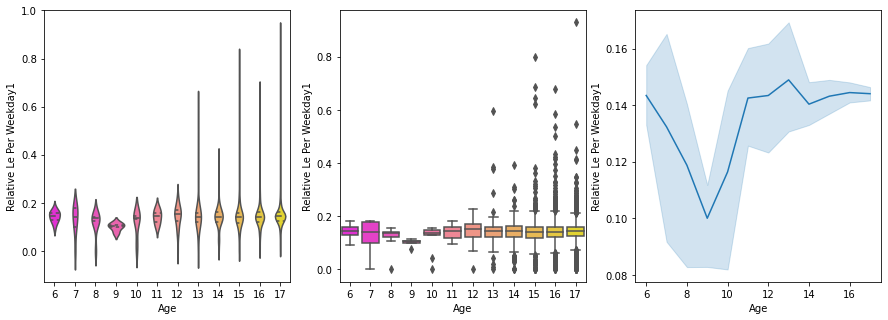

6 -> 7: Ttest_indResult(statistic=-1.475891253507754, pvalue=0.15297369464893065)
7 -> 8: Ttest_indResult(statistic=1.9438860931384194, pvalue=0.0697102605641251)
8 -> 9: Ttest_indResult(statistic=-0.20118207438149893, pvalue=0.8442279938806492)
9 -> 10: Ttest_indResult(statistic=-0.004793099905481038, pvalue=0.9962614958805629)
10 -> 11: Ttest_indResult(statistic=-2.7307698184394558, pvalue=0.014807635650650164)
11 -> 12: Ttest_indResult(statistic=-0.3156960073900599, pvalue=0.7543489105510182)
12 -> 13: Ttest_indResult(statistic=1.8015911739708883, pvalue=0.07492146130068844)
13 -> 14: Ttest_indResult(statistic=-0.42323450894124165, pvalue=0.6724795062934508)
14 -> 15: Ttest_indResult(statistic=0.9216853828816247, pvalue=0.3570195892585247)
15 -> 16: Ttest_indResult(statistic=-1.027817759091441, pvalue=0.3042085328194872)
16 -> 17: Ttest_indResult(statistic=-2.201371819014198, pvalue=0.027797889161469698)


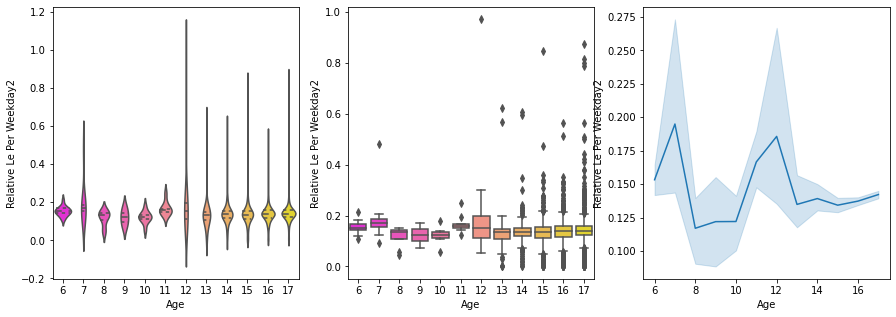

6 -> 7: Ttest_indResult(statistic=-0.26551613323386647, pvalue=0.7928793204149235)
7 -> 8: Ttest_indResult(statistic=0.9775682564718929, pvalue=0.3428382128328654)
8 -> 9: Ttest_indResult(statistic=-0.7292654435151629, pvalue=0.481079337338559)
9 -> 10: Ttest_indResult(statistic=-0.5030002640076227, pvalue=0.6248829030647218)
10 -> 11: Ttest_indResult(statistic=1.2225563837316424, pvalue=0.23920142905774844)
11 -> 12: Ttest_indResult(statistic=-0.02948501652863364, pvalue=0.9766667778125322)
12 -> 13: Ttest_indResult(statistic=0.36536051904272027, pvalue=0.7156901580305953)
13 -> 14: Ttest_indResult(statistic=-0.8397786625742262, pvalue=0.40181606818876536)
14 -> 15: Ttest_indResult(statistic=-0.7771002689617975, pvalue=0.43736986058875715)
15 -> 16: Ttest_indResult(statistic=0.6410109209183422, pvalue=0.5216178002800049)
16 -> 17: Ttest_indResult(statistic=-0.20622934084279596, pvalue=0.8366280292042987)


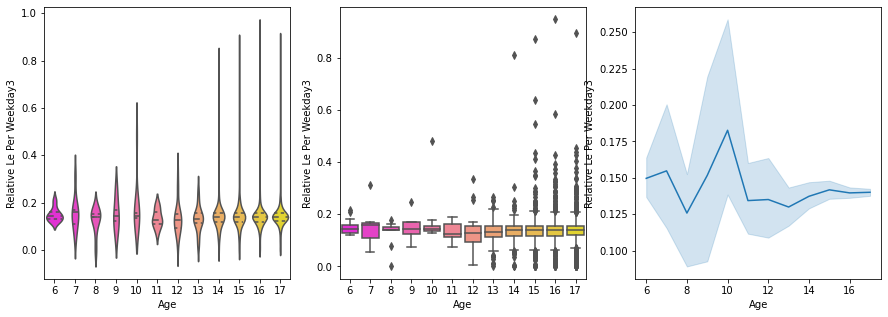

6 -> 7: Ttest_indResult(statistic=-0.5069517042625892, pvalue=0.6168151103363815)
7 -> 8: Ttest_indResult(statistic=1.1721494257685627, pvalue=0.2582952380421256)
8 -> 9: Ttest_indResult(statistic=-0.45322379593186785, pvalue=0.6591973909889515)
9 -> 10: Ttest_indResult(statistic=-0.5079573850079192, pvalue=0.621514083870935)
10 -> 11: Ttest_indResult(statistic=0.9970378987727595, pvalue=0.33358687599846903)
11 -> 12: Ttest_indResult(statistic=-0.29251462787377913, pvalue=0.771842134167294)
12 -> 13: Ttest_indResult(statistic=0.5997863445222996, pvalue=0.5501392121159329)
13 -> 14: Ttest_indResult(statistic=-1.6948994555385, pvalue=0.09131046904714382)
14 -> 15: Ttest_indResult(statistic=1.0193696438961988, pvalue=0.30839004027884154)
15 -> 16: Ttest_indResult(statistic=-1.259638545567764, pvalue=0.2080043282589147)
16 -> 17: Ttest_indResult(statistic=0.026426522684284515, pvalue=0.9789191816728907)


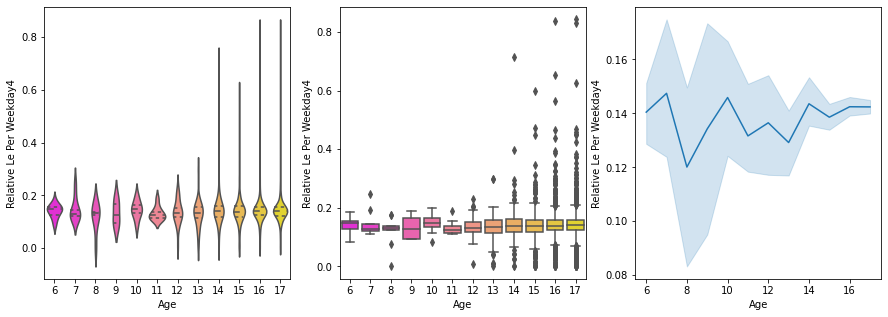

6 -> 7: Ttest_indResult(statistic=2.2248267398135355, pvalue=0.035750306982102686)
7 -> 8: Ttest_indResult(statistic=-1.7408140285316458, pvalue=0.10090809341612468)
8 -> 9: Ttest_indResult(statistic=0.8433047315369449, pvalue=0.41701907079089884)
9 -> 10: Ttest_indResult(statistic=-1.3857775194513309, pvalue=0.1932663953442902)
10 -> 11: Ttest_indResult(statistic=1.6201271522738574, pvalue=0.12474395673991423)
11 -> 12: Ttest_indResult(statistic=-0.5265239038589253, pvalue=0.6022715885650912)
12 -> 13: Ttest_indResult(statistic=0.40240672427553004, pvalue=0.6883284188961233)
13 -> 14: Ttest_indResult(statistic=-0.1559675558016024, pvalue=0.8761815123545083)
14 -> 15: Ttest_indResult(statistic=-0.15366516583938078, pvalue=0.8779193425485957)
15 -> 16: Ttest_indResult(statistic=0.2134503474591567, pvalue=0.8310059923004111)
16 -> 17: Ttest_indResult(statistic=-0.3731291728718468, pvalue=0.7090829364876405)


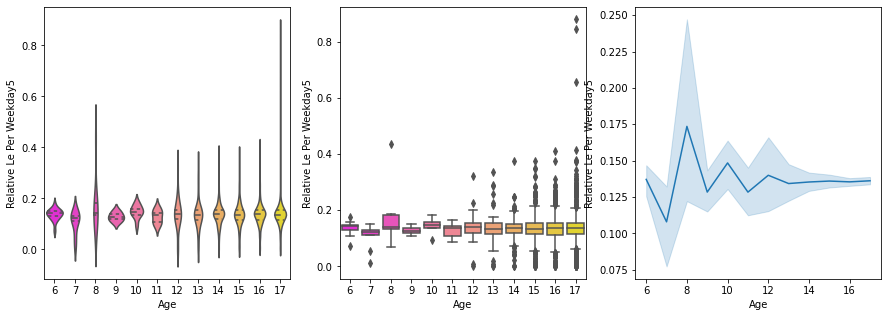

6 -> 7: Ttest_indResult(statistic=0.9118846551397527, pvalue=0.3708985657229288)
7 -> 8: Ttest_indResult(statistic=-2.1345073502436493, pvalue=0.04861899774016722)
8 -> 9: Ttest_indResult(statistic=-0.08889703950136874, pvalue=0.9307616084473787)
9 -> 10: Ttest_indResult(statistic=2.3106732035845785, pvalue=0.04124978645511143)
10 -> 11: Ttest_indResult(statistic=-0.37392315984836333, pvalue=0.7133702118173458)
11 -> 12: Ttest_indResult(statistic=0.1472654641772325, pvalue=0.8838761153757636)
12 -> 13: Ttest_indResult(statistic=-1.3846540147591284, pvalue=0.16954400171369227)
13 -> 14: Ttest_indResult(statistic=2.2246284604023825, pvalue=0.026978383543746123)
14 -> 15: Ttest_indResult(statistic=-0.6067299090711554, pvalue=0.5442326791300901)
15 -> 16: Ttest_indResult(statistic=1.9148267726325372, pvalue=0.055712958598921974)
16 -> 17: Ttest_indResult(statistic=0.727716139674323, pvalue=0.4668533507463377)


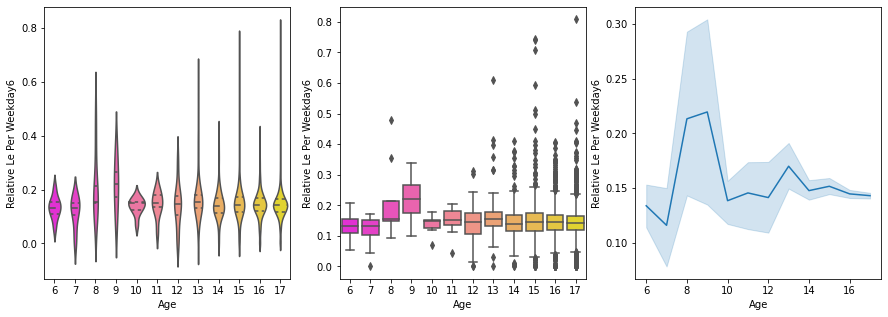

6 -> 7: Ttest_indResult(statistic=-0.22277927627086497, pvalue=0.8255924173963041)
7 -> 8: Ttest_indResult(statistic=0.5142705372484602, pvalue=0.6140927348274787)
8 -> 9: Ttest_indResult(statistic=-0.30827082458873284, pvalue=0.763635412543108)
9 -> 10: Ttest_indResult(statistic=-0.06362457936882557, pvalue=0.9504106287156626)
10 -> 11: Ttest_indResult(statistic=-0.2556950027877608, pvalue=0.8014444534703219)
11 -> 12: Ttest_indResult(statistic=1.230967002715711, pvalue=0.22759327849996525)
12 -> 13: Ttest_indResult(statistic=-1.8793817151666787, pvalue=0.06339255798311158)
13 -> 14: Ttest_indResult(statistic=-0.35758605432174867, pvalue=0.7209477461306412)
14 -> 15: Ttest_indResult(statistic=0.3468892703972801, pvalue=0.7287818302934683)
15 -> 16: Ttest_indResult(statistic=-0.3871230872540453, pvalue=0.6987224100739369)
16 -> 17: Ttest_indResult(statistic=1.4827463302211965, pvalue=0.13826385987900056)


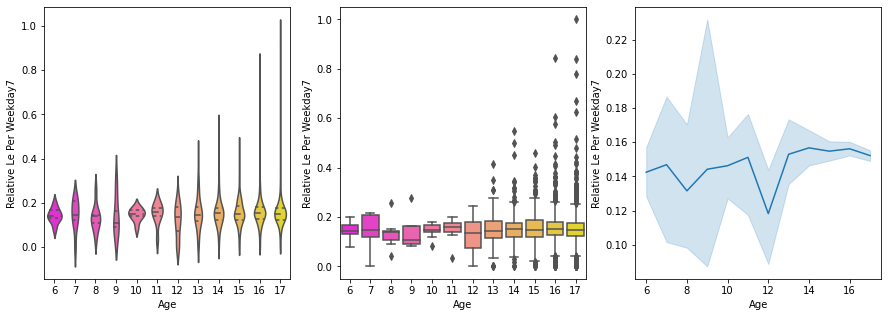

6 -> 7: Ttest_indResult(statistic=-0.2094029405488368, pvalue=0.8359010114768175)
7 -> 8: Ttest_indResult(statistic=-0.7533319194472293, pvalue=0.46219253382530845)
8 -> 9: Ttest_indResult(statistic=0.6954613093419262, pvalue=0.5011945056841939)
9 -> 10: Ttest_indResult(statistic=0.47930260493766813, pvalue=0.6411105004908131)
10 -> 11: Ttest_indResult(statistic=0.09078045443971161, pvalue=0.92879382853156)
11 -> 12: Ttest_indResult(statistic=-0.9417944634280574, pvalue=0.35357976996140106)
12 -> 13: Ttest_indResult(statistic=0.21003985489968074, pvalue=0.8341061208806463)
13 -> 14: Ttest_indResult(statistic=-0.711666178307988, pvalue=0.47731951158019215)
14 -> 15: Ttest_indResult(statistic=0.7703525036615296, pvalue=0.44135836790774763)
15 -> 16: Ttest_indResult(statistic=-0.024320386183838496, pvalue=0.9806004287528856)
16 -> 17: Ttest_indResult(statistic=0.5456223722203214, pvalue=0.5853726749142321)


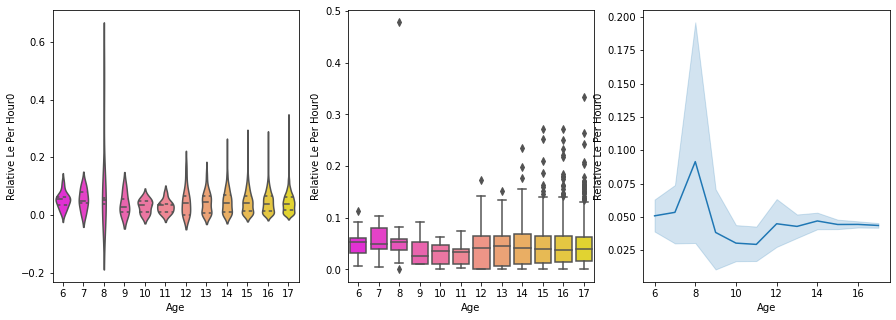

6 -> 7: Ttest_indResult(statistic=-0.6842025790007462, pvalue=0.5004012231218748)
7 -> 8: Ttest_indResult(statistic=1.0020977473552226, pvalue=0.33121174340486437)
8 -> 9: Ttest_indResult(statistic=0.49419779780002987, pvalue=0.6308870535583391)
9 -> 10: Ttest_indResult(statistic=-0.1488825336999512, pvalue=0.8843407071858204)
10 -> 11: Ttest_indResult(statistic=0.2048307057585432, pvalue=0.840287427005934)
11 -> 12: Ttest_indResult(statistic=-0.8140404849997835, pvalue=0.4218310077315034)
12 -> 13: Ttest_indResult(statistic=0.4799540855725099, pvalue=0.6324116782433533)
13 -> 14: Ttest_indResult(statistic=-1.0905962791717783, pvalue=0.2764760028523926)
14 -> 15: Ttest_indResult(statistic=1.7352869670585833, pvalue=0.0831430354456375)
15 -> 16: Ttest_indResult(statistic=-0.727363385998719, pvalue=0.46712186077080264)
16 -> 17: Ttest_indResult(statistic=1.778264108304979, pvalue=0.07547813703570723)


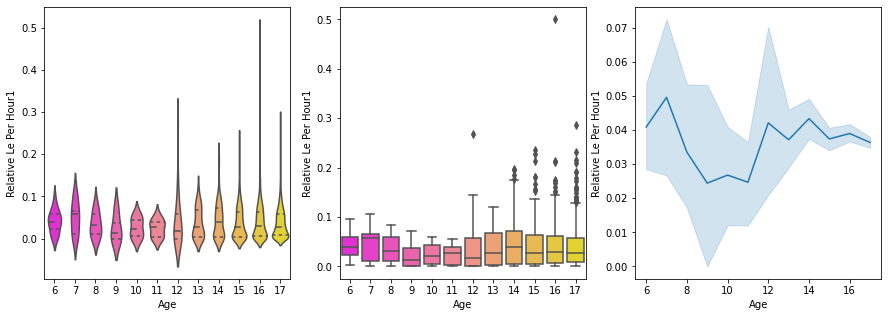

6 -> 7: Ttest_indResult(statistic=-0.8039213458329746, pvalue=0.429333739786415)
7 -> 8: Ttest_indResult(statistic=0.9580701536271102, pvalue=0.3522816930442747)
8 -> 9: Ttest_indResult(statistic=0.5627307985472557, pvalue=0.5849045112873676)
9 -> 10: Ttest_indResult(statistic=-0.04493524500733296, pvalue=0.9649642916090772)
10 -> 11: Ttest_indResult(statistic=0.09581851353206737, pvalue=0.9248545783170559)
11 -> 12: Ttest_indResult(statistic=-0.6520429673726268, pvalue=0.5191791669443118)
12 -> 13: Ttest_indResult(statistic=-0.2001518839849162, pvalue=0.841808414088359)
13 -> 14: Ttest_indResult(statistic=-1.0371951216326185, pvalue=0.3006236204214899)
14 -> 15: Ttest_indResult(statistic=1.2093766329886642, pvalue=0.2269384779197796)
15 -> 16: Ttest_indResult(statistic=0.00039541463763000394, pvalue=0.9996845596567945)
16 -> 17: Ttest_indResult(statistic=1.1685772855902377, pvalue=0.24268186452291501)


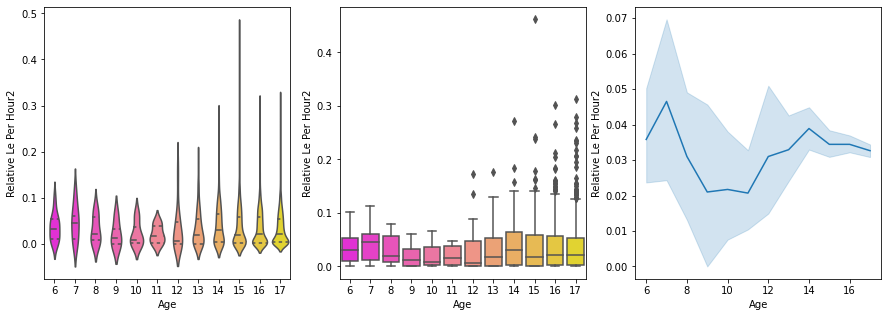

6 -> 7: Ttest_indResult(statistic=-2.464687563042258, pvalue=0.021256730038593793)
7 -> 8: Ttest_indResult(statistic=1.8000088352682087, pvalue=0.0907417871092631)
8 -> 9: Ttest_indResult(statistic=0.662439066591584, pvalue=0.5213274748327423)
9 -> 10: Ttest_indResult(statistic=-0.33333369921837025, pvalue=0.7451496393082931)
10 -> 11: Ttest_indResult(statistic=0.6294165642175719, pvalue=0.5379607425688075)
11 -> 12: Ttest_indResult(statistic=-0.6763207796901871, pvalue=0.50385216346332)
12 -> 13: Ttest_indResult(statistic=-0.35755156286221096, pvalue=0.7215068679945975)
13 -> 14: Ttest_indResult(statistic=-1.5302723065870811, pvalue=0.12718406426134982)
14 -> 15: Ttest_indResult(statistic=1.8713555819090146, pvalue=0.061724970597703765)
15 -> 16: Ttest_indResult(statistic=-0.5690951776503739, pvalue=0.5693804864848053)
16 -> 17: Ttest_indResult(statistic=1.1412499711037178, pvalue=0.2538717489756316)


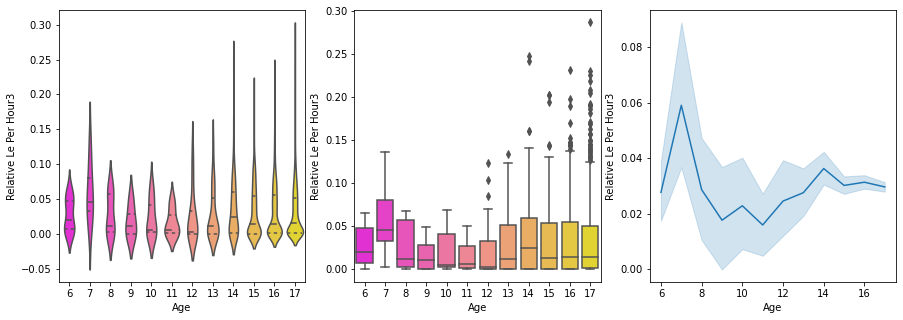

6 -> 7: Ttest_indResult(statistic=-2.5086318653633084, pvalue=0.01927986991168043)
7 -> 8: Ttest_indResult(statistic=1.8603912885464111, pvalue=0.08131195874879603)
8 -> 9: Ttest_indResult(statistic=0.799937047422704, pvalue=0.4406806620396553)
9 -> 10: Ttest_indResult(statistic=-0.6469687433031303, pvalue=0.5309208153082183)
10 -> 11: Ttest_indResult(statistic=0.8947190600630995, pvalue=0.3841995281411712)
11 -> 12: Ttest_indResult(statistic=-0.6485239917716065, pvalue=0.5214215420128414)
12 -> 13: Ttest_indResult(statistic=-0.43660380266071686, pvalue=0.6634328945106027)
13 -> 14: Ttest_indResult(statistic=-1.3841199169132632, pvalue=0.16752717643640117)
14 -> 15: Ttest_indResult(statistic=1.3852482154296664, pvalue=0.1664308130226315)
15 -> 16: Ttest_indResult(statistic=-0.8102001419234964, pvalue=0.41795930332875986)
16 -> 17: Ttest_indResult(statistic=0.03270202222953412, pvalue=0.9739147388551264)


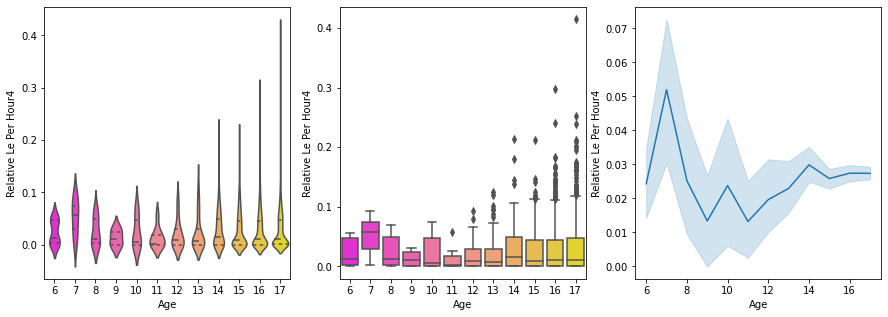

6 -> 7: Ttest_indResult(statistic=-1.9453410399716358, pvalue=0.06353870887136262)
7 -> 8: Ttest_indResult(statistic=1.4729524062250068, pvalue=0.16016331977487325)
8 -> 9: Ttest_indResult(statistic=1.060042577101101, pvalue=0.3118465318126076)
9 -> 10: Ttest_indResult(statistic=-0.8188832801907981, pvalue=0.43023695436023335)
10 -> 11: Ttest_indResult(statistic=0.9025635610814869, pvalue=0.3801448646008906)
11 -> 12: Ttest_indResult(statistic=-0.6847494231862622, pvalue=0.4985901486365365)
12 -> 13: Ttest_indResult(statistic=-0.49065573788063194, pvalue=0.6248510426728779)
13 -> 14: Ttest_indResult(statistic=-1.016637322783138, pvalue=0.3102858333246991)
14 -> 15: Ttest_indResult(statistic=0.7883842582859008, pvalue=0.430746726390008)
15 -> 16: Ttest_indResult(statistic=-0.3315614756310102, pvalue=0.7402687606207428)
16 -> 17: Ttest_indResult(statistic=-0.4646913042248921, pvalue=0.6421917182755786)


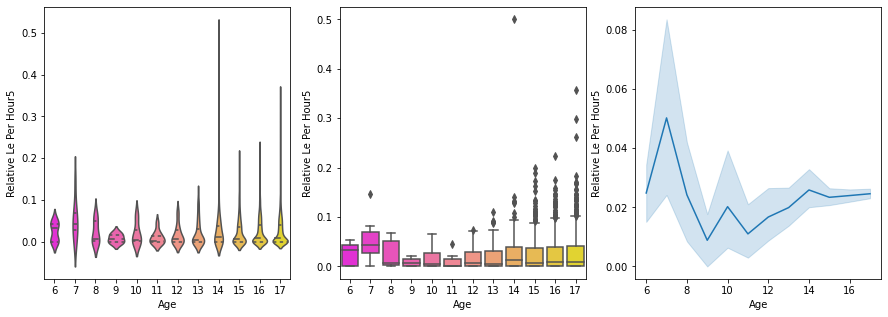

6 -> 7: Ttest_indResult(statistic=-2.258392069974197, pvalue=0.03328769720508239)
7 -> 8: Ttest_indResult(statistic=1.6535386633092102, pvalue=0.11770421644579845)
8 -> 9: Ttest_indResult(statistic=1.0546371647448125, pvalue=0.31420532338518115)
9 -> 10: Ttest_indResult(statistic=-1.002429180213139, pvalue=0.33767794422238573)
10 -> 11: Ttest_indResult(statistic=1.302878152498252, pvalue=0.21105659732422088)
11 -> 12: Ttest_indResult(statistic=-0.9087549547973072, pvalue=0.37049073165571167)
12 -> 13: Ttest_indResult(statistic=0.16300349894407629, pvalue=0.8708771215523066)
13 -> 14: Ttest_indResult(statistic=-1.5134155788852257, pvalue=0.13140770166272242)
14 -> 15: Ttest_indResult(statistic=0.17042113985845442, pvalue=0.8647296401792126)
15 -> 16: Ttest_indResult(statistic=-0.6590556517753017, pvalue=0.5099656237725474)
16 -> 17: Ttest_indResult(statistic=-1.4410775205402382, pvalue=0.14968404087924186)


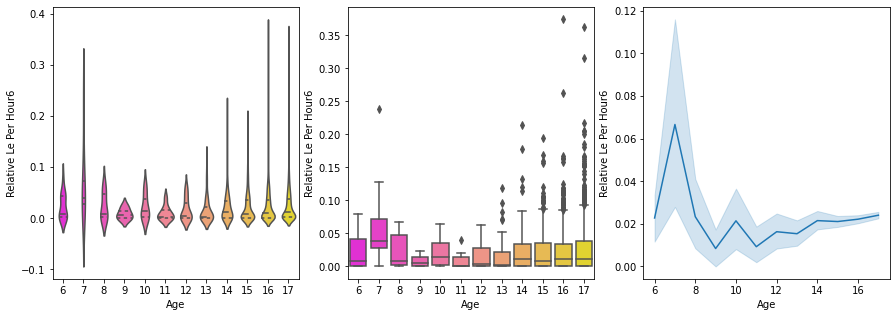

6 -> 7: Ttest_indResult(statistic=-1.0078597954024682, pvalue=0.3235757236406037)
7 -> 8: Ttest_indResult(statistic=1.3594416753873857, pvalue=0.19285922835596359)
8 -> 9: Ttest_indResult(statistic=0.9872276949295422, pvalue=0.3447489247700033)
9 -> 10: Ttest_indResult(statistic=-1.5200896127779375, pvalue=0.15669760928652962)
10 -> 11: Ttest_indResult(statistic=1.678138506388525, pvalue=0.11274177253709768)
11 -> 12: Ttest_indResult(statistic=-0.7611935647105983, pvalue=0.45229335419139705)
12 -> 13: Ttest_indResult(statistic=0.04456285634762817, pvalue=0.9645533914515859)
13 -> 14: Ttest_indResult(statistic=-1.3394933629258088, pvalue=0.18159805451759292)
14 -> 15: Ttest_indResult(statistic=-0.19167278615417835, pvalue=0.8480557433246575)
15 -> 16: Ttest_indResult(statistic=-0.5891119337999075, pvalue=0.555878784663614)
16 -> 17: Ttest_indResult(statistic=-1.556658517116886, pvalue=0.11967413776319179)


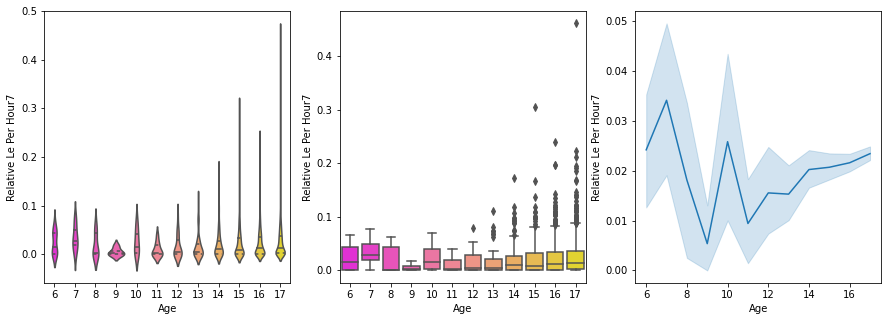

6 -> 7: Ttest_indResult(statistic=-1.4898281904005892, pvalue=0.14929497275224243)
7 -> 8: Ttest_indResult(statistic=1.5892312216496114, pvalue=0.13157066768460718)
8 -> 9: Ttest_indResult(statistic=0.902885507923359, pvalue=0.3859314875898475)
9 -> 10: Ttest_indResult(statistic=-1.1643544472353031, pvalue=0.2689120319381608)
10 -> 11: Ttest_indResult(statistic=1.4911490439173847, pvalue=0.155373874374041)
11 -> 12: Ttest_indResult(statistic=-0.6509932648561111, pvalue=0.5198475153868269)
12 -> 13: Ttest_indResult(statistic=-0.5388486368510399, pvalue=0.5913071085341925)
13 -> 14: Ttest_indResult(statistic=0.8167889403057148, pvalue=0.4148084892731082)
14 -> 15: Ttest_indResult(statistic=-0.36932390653261854, pvalue=0.7120012828918878)
15 -> 16: Ttest_indResult(statistic=-0.33223921198448814, pvalue=0.7397570916501195)
16 -> 17: Ttest_indResult(statistic=-2.004454204681242, pvalue=0.04512567301593796)


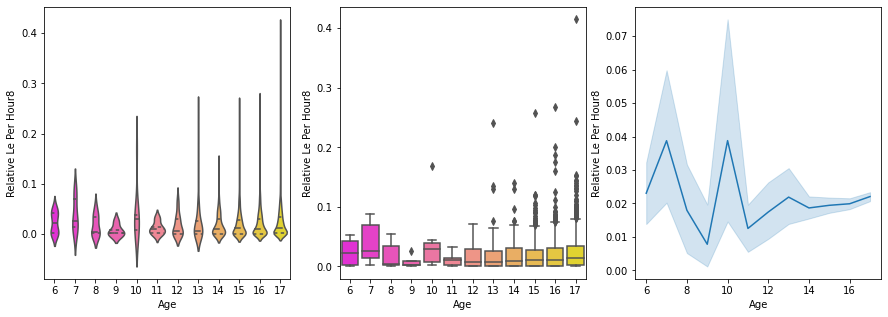

6 -> 7: Ttest_indResult(statistic=-1.840212235777304, pvalue=0.07813670037687119)
7 -> 8: Ttest_indResult(statistic=1.649079366298517, pvalue=0.11862360870179013)
8 -> 9: Ttest_indResult(statistic=0.7867982537906818, pvalue=0.44801976439442914)
9 -> 10: Ttest_indResult(statistic=-2.8806086492739924, pvalue=0.014954992955222483)
10 -> 11: Ttest_indResult(statistic=1.9512140743608004, pvalue=0.06876657941434702)
11 -> 12: Ttest_indResult(statistic=-0.018724784237051456, pvalue=0.9851806580641087)
12 -> 13: Ttest_indResult(statistic=-0.44363864696816085, pvalue=0.6583569036784565)
13 -> 14: Ttest_indResult(statistic=0.7760906947124172, pvalue=0.4384118457057512)
14 -> 15: Ttest_indResult(statistic=0.5496395090470227, pvalue=0.5827471181591981)
15 -> 16: Ttest_indResult(statistic=-0.3094603468397586, pvalue=0.7570162366169296)
16 -> 17: Ttest_indResult(statistic=-1.5185883184300448, pvalue=0.1289885822598209)


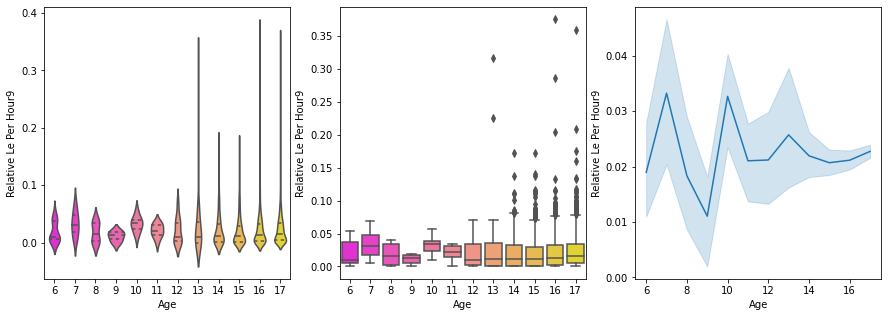

6 -> 7: Ttest_indResult(statistic=-1.6921861300387986, pvalue=0.10355531683351005)
7 -> 8: Ttest_indResult(statistic=2.1838895450198934, pvalue=0.044204528501670934)
8 -> 9: Ttest_indResult(statistic=-0.1165673888120889, pvalue=0.909303865098412)
9 -> 10: Ttest_indResult(statistic=-1.5653646680727493, pvalue=0.14579300733029274)
10 -> 11: Ttest_indResult(statistic=1.289709691257611, pvalue=0.21548286624079427)
11 -> 12: Ttest_indResult(statistic=0.5595842076392508, pvalue=0.5797841655885312)
12 -> 13: Ttest_indResult(statistic=-0.5782045340291202, pvalue=0.5645542103782544)
13 -> 14: Ttest_indResult(statistic=1.0193569569427356, pvalue=0.30899589246355336)
14 -> 15: Ttest_indResult(statistic=0.22324216772207917, pvalue=0.8234140795233643)
15 -> 16: Ttest_indResult(statistic=0.6605373326858808, pvalue=0.5090149386525586)
16 -> 17: Ttest_indResult(statistic=-3.003978894241391, pvalue=0.002690338798946201)


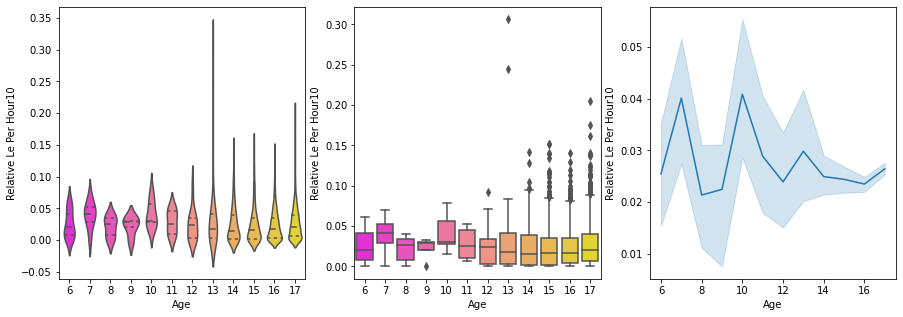

6 -> 7: Ttest_indResult(statistic=-0.6289392604044453, pvalue=0.5353297944934922)
7 -> 8: Ttest_indResult(statistic=1.092480222077459, pvalue=0.2907992472359194)
8 -> 9: Ttest_indResult(statistic=-0.49186293462816066, pvalue=0.6324843631834967)
9 -> 10: Ttest_indResult(statistic=-0.41582596735016, pvalue=0.6855340774249191)
10 -> 11: Ttest_indResult(statistic=0.250362210635752, pvalue=0.8054936681984421)
11 -> 12: Ttest_indResult(statistic=0.2868101519311164, pvalue=0.7761659937895717)
12 -> 13: Ttest_indResult(statistic=0.160701724522477, pvalue=0.8726845433019758)
13 -> 14: Ttest_indResult(statistic=1.0805433964314002, pvalue=0.2809171692480239)
14 -> 15: Ttest_indResult(statistic=-0.17908911959499324, pvalue=0.8579210715069854)
15 -> 16: Ttest_indResult(statistic=0.2791616170769431, pvalue=0.7801609687593626)
16 -> 17: Ttest_indResult(statistic=-2.5355001242178896, pvalue=0.011287216565511477)


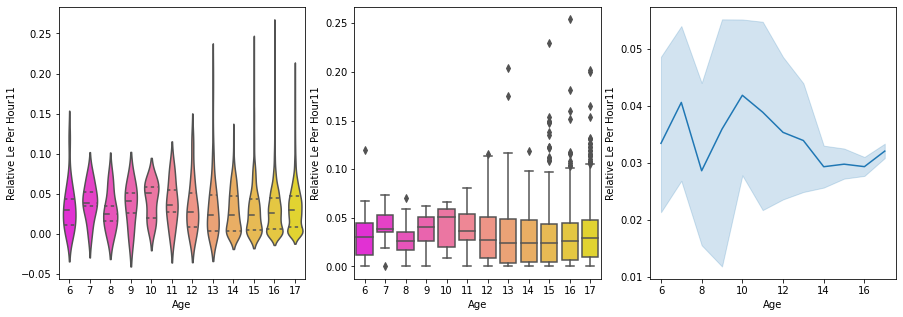

6 -> 7: Ttest_indResult(statistic=-0.5302371806058942, pvalue=0.6008194973277134)
7 -> 8: Ttest_indResult(statistic=1.0122110574050514, pvalue=0.3265004594575375)
8 -> 9: Ttest_indResult(statistic=-0.3520071240896093, pvalue=0.7314839136297548)
9 -> 10: Ttest_indResult(statistic=-0.04431307072831652, pvalue=0.9654490480251722)
10 -> 11: Ttest_indResult(statistic=-0.7876116083699636, pvalue=0.4424361633157895)
11 -> 12: Ttest_indResult(statistic=1.105264597697168, pvalue=0.27754955185477476)
12 -> 13: Ttest_indResult(statistic=-0.008754890887674654, pvalue=0.9930338616137878)
13 -> 14: Ttest_indResult(statistic=0.8590033438392546, pvalue=0.3911422854904346)
14 -> 15: Ttest_indResult(statistic=-1.3306666598512427, pvalue=0.1837447480326579)
15 -> 16: Ttest_indResult(statistic=1.3321672759359606, pvalue=0.18301645487688412)
16 -> 17: Ttest_indResult(statistic=-2.9521848649466094, pvalue=0.0031837854050895172)


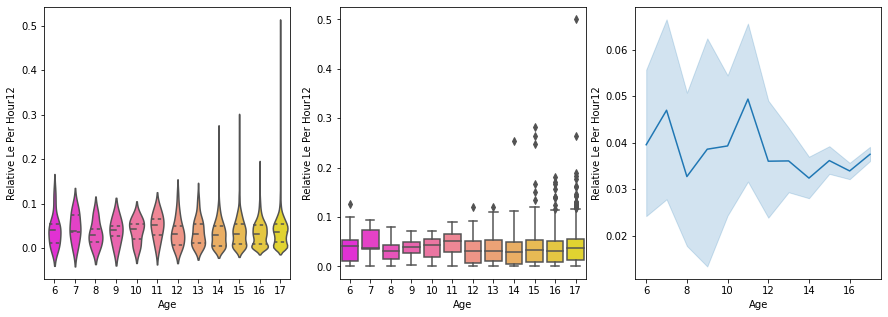

6 -> 7: Ttest_indResult(statistic=-0.4229374495662378, pvalue=0.6761065385710352)
7 -> 8: Ttest_indResult(statistic=0.5655212570758489, pvalue=0.5795641014881344)
8 -> 9: Ttest_indResult(statistic=-0.4238018635777961, pvalue=0.6798789466173774)
9 -> 10: Ttest_indResult(statistic=-0.3336007976144923, pvalue=0.7449535090042447)
10 -> 11: Ttest_indResult(statistic=-0.7328739309045216, pvalue=0.4742363589770213)
11 -> 12: Ttest_indResult(statistic=1.9686918078560933, pvalue=0.057985138674030816)
12 -> 13: Ttest_indResult(statistic=-0.5805751404460491, pvalue=0.5629618322856511)
13 -> 14: Ttest_indResult(statistic=0.5269579103399762, pvalue=0.598679139205897)
14 -> 15: Ttest_indResult(statistic=-1.2878479409409511, pvalue=0.19823698893608738)
15 -> 16: Ttest_indResult(statistic=0.2472101992958007, pvalue=0.8047808658733081)
16 -> 17: Ttest_indResult(statistic=-1.6981040138151497, pvalue=0.08960862317379051)


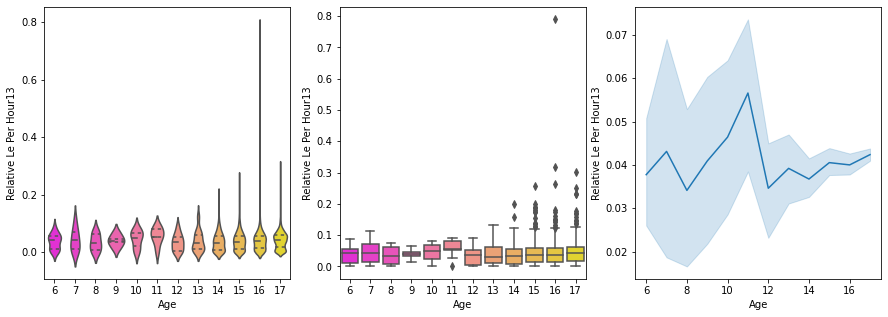

6 -> 7: Ttest_indResult(statistic=-0.06116159600737784, pvalue=0.9517369996061195)
7 -> 8: Ttest_indResult(statistic=-0.3684990098063557, pvalue=0.7173314724938153)
8 -> 9: Ttest_indResult(statistic=-0.23192203497647554, pvalue=0.8208566419198304)
9 -> 10: Ttest_indResult(statistic=-0.48625376080047283, pvalue=0.6363296653036167)
10 -> 11: Ttest_indResult(statistic=0.1608499345747, pvalue=0.8742250003062859)
11 -> 12: Ttest_indResult(statistic=1.0219558692171682, pvalue=0.31471119914937284)
12 -> 13: Ttest_indResult(statistic=-0.7913607717840636, pvalue=0.43079133378641976)
13 -> 14: Ttest_indResult(statistic=1.2853041939644285, pvalue=0.19984756784578123)
14 -> 15: Ttest_indResult(statistic=-0.45678014719671595, pvalue=0.6479749499647678)
15 -> 16: Ttest_indResult(statistic=-0.20411395627233794, pvalue=0.8382933510101561)
16 -> 17: Ttest_indResult(statistic=-1.6752569870370881, pvalue=0.09400490794212932)


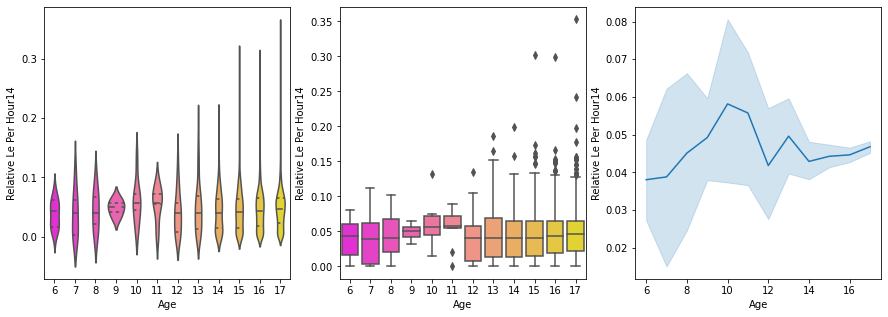

6 -> 7: Ttest_indResult(statistic=1.4426945960965714, pvalue=0.16203162671240526)
7 -> 8: Ttest_indResult(statistic=-1.4146979162697375, pvalue=0.17632343630189312)
8 -> 9: Ttest_indResult(statistic=-0.1621174586835889, pvalue=0.8741529258701791)
9 -> 10: Ttest_indResult(statistic=0.6533791366241645, pvalue=0.5269332756352542)
10 -> 11: Ttest_indResult(statistic=-0.5629412725672044, pvalue=0.5812782397227512)
11 -> 12: Ttest_indResult(statistic=0.12370636673013413, pvalue=0.9023463909722327)
12 -> 13: Ttest_indResult(statistic=0.5026197731443374, pvalue=0.6164458392333458)
13 -> 14: Ttest_indResult(statistic=0.4042196835261716, pvalue=0.6863886700892676)
14 -> 15: Ttest_indResult(statistic=-0.6174954207060583, pvalue=0.5371147213670752)
15 -> 16: Ttest_indResult(statistic=-0.6481459075194339, pvalue=0.5169941309195331)
16 -> 17: Ttest_indResult(statistic=-0.403562388797322, pvalue=0.6865679655022605)


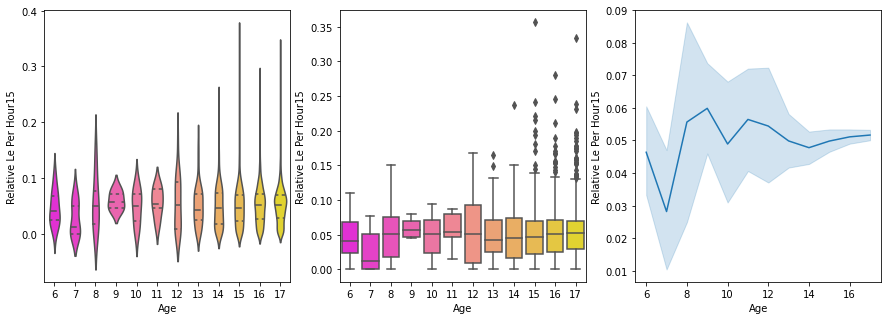

6 -> 7: Ttest_indResult(statistic=2.424956212530667, pvalue=0.02320395322986271)
7 -> 8: Ttest_indResult(statistic=-1.5117450655883966, pvalue=0.15009722039294468)
8 -> 9: Ttest_indResult(statistic=-1.0866456801677562, pvalue=0.300431564352428)
9 -> 10: Ttest_indResult(statistic=1.2415425861674125, pvalue=0.2402274112565975)
10 -> 11: Ttest_indResult(statistic=-1.8594256464892371, pvalue=0.08145564692559899)
11 -> 12: Ttest_indResult(statistic=0.5503864351250307, pvalue=0.5859988614905625)
12 -> 13: Ttest_indResult(statistic=0.10526365032434881, pvalue=0.9163982847660158)
13 -> 14: Ttest_indResult(statistic=0.48279183915235574, pvalue=0.6296561374631136)
14 -> 15: Ttest_indResult(statistic=-0.7152000596955158, pvalue=0.47473091080046603)
15 -> 16: Ttest_indResult(statistic=0.14902725642736678, pvalue=0.881553036257302)
16 -> 17: Ttest_indResult(statistic=-0.2843748424991846, pvalue=0.7761459399633225)


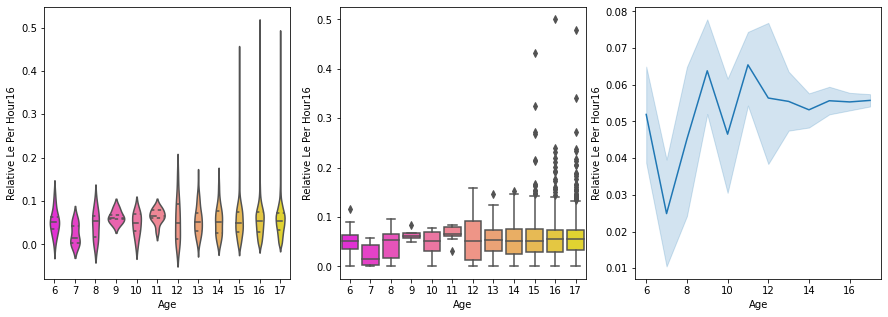

6 -> 7: Ttest_indResult(statistic=2.963080036984371, pvalue=0.006773553197771035)
7 -> 8: Ttest_indResult(statistic=-2.264005786530386, pvalue=0.037823683023610576)
8 -> 9: Ttest_indResult(statistic=-1.1142166212647535, pvalue=0.28893945624090267)
9 -> 10: Ttest_indResult(statistic=1.71940442617352, pvalue=0.11351564358434142)
10 -> 11: Ttest_indResult(statistic=-1.5469312456032311, pvalue=0.14142935361572595)
11 -> 12: Ttest_indResult(statistic=0.8829445749123255, pvalue=0.3840622257555528)
12 -> 13: Ttest_indResult(statistic=0.4888909774103887, pvalue=0.6260951009972262)
13 -> 14: Ttest_indResult(statistic=0.17414313520774716, pvalue=0.8618906056817383)
14 -> 15: Ttest_indResult(statistic=-0.8366618465028023, pvalue=0.4030765899565135)
15 -> 16: Ttest_indResult(statistic=0.44672988175904194, pvalue=0.6551374188711647)
16 -> 17: Ttest_indResult(statistic=1.0557876244097377, pvalue=0.2911640295766375)


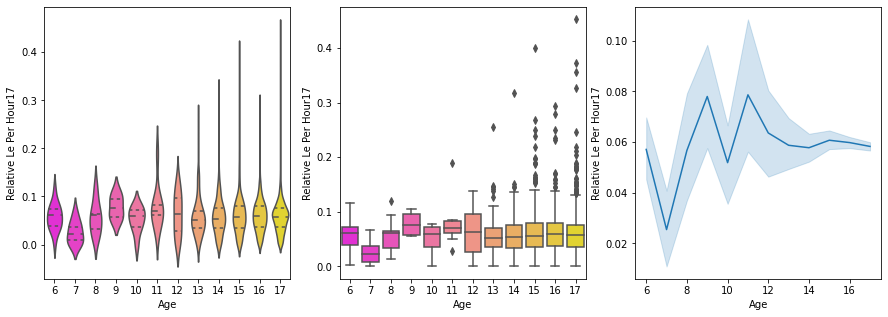

6 -> 7: Ttest_indResult(statistic=3.5667495435802223, pvalue=0.001561451865868092)
7 -> 8: Ttest_indResult(statistic=-2.0475399545111896, pvalue=0.05738963723592782)
8 -> 9: Ttest_indResult(statistic=-1.1786371644653844, pvalue=0.26340993926858147)
9 -> 10: Ttest_indResult(statistic=1.904984501369943, pvalue=0.08324497939251141)
10 -> 11: Ttest_indResult(statistic=-1.1368087968746023, pvalue=0.2723581122740147)
11 -> 12: Ttest_indResult(statistic=0.6651393161072273, pvalue=0.5108799611158323)
12 -> 13: Ttest_indResult(statistic=-0.7574967731692321, pvalue=0.4507093541095115)
13 -> 14: Ttest_indResult(statistic=0.8098262190236032, pvalue=0.41879215916631507)
14 -> 15: Ttest_indResult(statistic=-0.0035914693839475967, pvalue=0.9971354815223761)
15 -> 16: Ttest_indResult(statistic=-0.9077162603291179, pvalue=0.36418034474387295)
16 -> 17: Ttest_indResult(statistic=3.44674742272622, pvalue=0.000576450482900125)


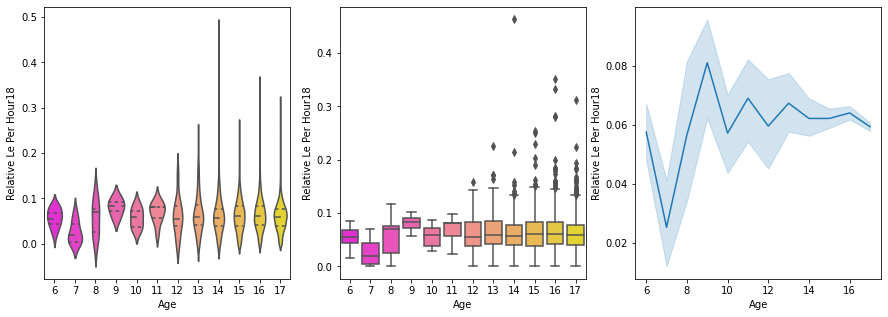

6 -> 7: Ttest_indResult(statistic=3.2406082632254383, pvalue=0.0034805004267178517)
7 -> 8: Ttest_indResult(statistic=-2.139711068953252, pvalue=0.048135384480381585)
8 -> 9: Ttest_indResult(statistic=0.15353007945351885, pvalue=0.8807606000141881)
9 -> 10: Ttest_indResult(statistic=1.932133356870794, pvalue=0.07949777199997816)
10 -> 11: Ttest_indResult(statistic=-1.5545775084274978, pvalue=0.1396024867031209)
11 -> 12: Ttest_indResult(statistic=0.8944442521951211, pvalue=0.3779765220459699)
12 -> 13: Ttest_indResult(statistic=-0.4764382613099324, pvalue=0.6349041822077419)
13 -> 14: Ttest_indResult(statistic=1.0378027388320958, pvalue=0.3003411410476069)
14 -> 15: Ttest_indResult(statistic=-0.028020245662725474, pvalue=0.9776542249478736)
15 -> 16: Ttest_indResult(statistic=0.374629080024177, pvalue=0.7079916196763008)
16 -> 17: Ttest_indResult(statistic=2.558207995068458, pvalue=0.010577918522260518)


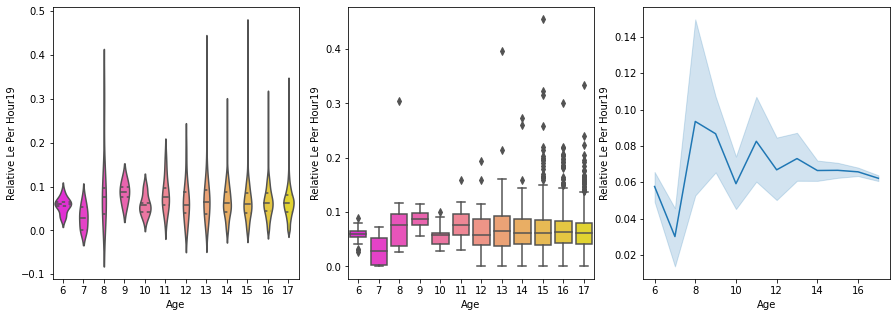

6 -> 7: Ttest_indResult(statistic=3.41644887799476, pvalue=0.002264126832172456)
7 -> 8: Ttest_indResult(statistic=-2.310616394224117, pvalue=0.034516999963788604)
8 -> 9: Ttest_indResult(statistic=-1.2515198949238941, pvalue=0.2367053701694179)
9 -> 10: Ttest_indResult(statistic=2.0675490896209205, pvalue=0.06303905460824902)
10 -> 11: Ttest_indResult(statistic=-1.3491474478213499, pvalue=0.19607389498387698)
11 -> 12: Ttest_indResult(statistic=1.30061520732127, pvalue=0.2029761835482186)
12 -> 13: Ttest_indResult(statistic=-0.7644041407615082, pvalue=0.4466040812612826)
13 -> 14: Ttest_indResult(statistic=0.2132462316552654, pvalue=0.8313046325103939)
14 -> 15: Ttest_indResult(statistic=-0.2961344245958925, pvalue=0.7672178400339518)
15 -> 16: Ttest_indResult(statistic=0.6545012390422582, pvalue=0.5128936662741359)
16 -> 17: Ttest_indResult(statistic=2.5691750619944194, pvalue=0.010249778949721622)


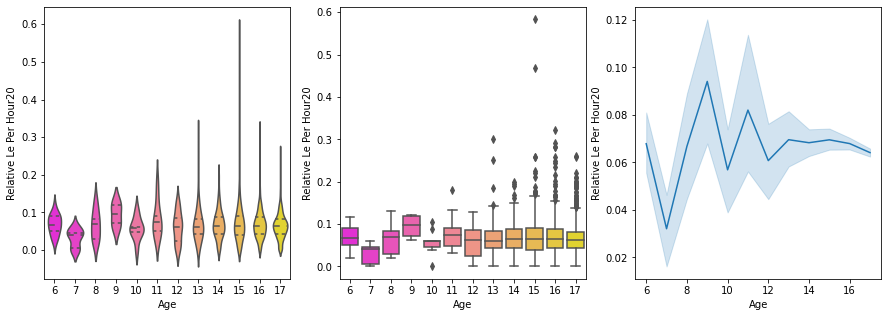

6 -> 7: Ttest_indResult(statistic=2.243460762512765, pvalue=0.0343634877855865)
7 -> 8: Ttest_indResult(statistic=-1.8426767899463148, pvalue=0.08398401951209068)
8 -> 9: Ttest_indResult(statistic=-0.964609607815595, pvalue=0.3554681102949855)
9 -> 10: Ttest_indResult(statistic=-0.37630891011945505, pvalue=0.71384443750292)
10 -> 11: Ttest_indResult(statistic=0.6466270857623753, pvalue=0.5270411766005387)
11 -> 12: Ttest_indResult(statistic=-0.19202369760342128, pvalue=0.8489759822362279)
12 -> 13: Ttest_indResult(statistic=0.7737754496683202, pvalue=0.4410691409166956)
13 -> 14: Ttest_indResult(statistic=0.33990374175323745, pvalue=0.7342077320552315)
14 -> 15: Ttest_indResult(statistic=-0.7391429075260599, pvalue=0.46007528410546195)
15 -> 16: Ttest_indResult(statistic=0.8656266619338431, pvalue=0.3868394210846551)
16 -> 17: Ttest_indResult(statistic=1.167139710955026, pvalue=0.2432617286506333)


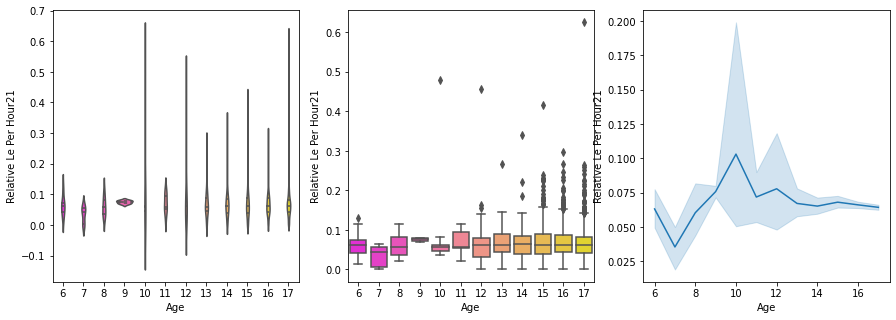

6 -> 7: Ttest_indResult(statistic=1.317525247518509, pvalue=0.20010246069033594)
7 -> 8: Ttest_indResult(statistic=-0.15855258769454778, pvalue=0.8760053503503991)
8 -> 9: Ttest_indResult(statistic=-0.7054432387024565, pvalue=0.4952022652542062)
9 -> 10: Ttest_indResult(statistic=1.4304785270858396, pvalue=0.18036669777206293)
10 -> 11: Ttest_indResult(statistic=-0.574644545210877, pvalue=0.5735235303666987)
11 -> 12: Ttest_indResult(statistic=-0.728682927325945, pvalue=0.4716650162525785)
12 -> 13: Ttest_indResult(statistic=1.5571438686568917, pvalue=0.12290749348024813)
13 -> 14: Ttest_indResult(statistic=0.23779252013014937, pvalue=0.8122322269861727)
14 -> 15: Ttest_indResult(statistic=-1.4418713356236244, pvalue=0.14979905172786728)
15 -> 16: Ttest_indResult(statistic=0.8233798408454599, pvalue=0.41042864591878636)
16 -> 17: Ttest_indResult(statistic=0.3613971703252744, pvalue=0.7178321319848324)


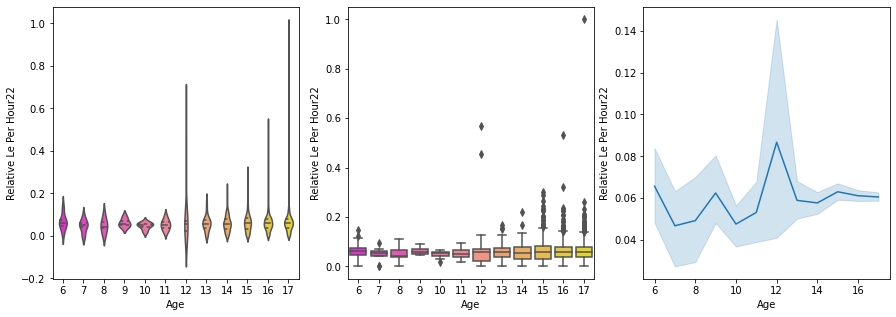

6 -> 7: Ttest_indResult(statistic=0.48177821030552553, pvalue=0.634327709514072)
7 -> 8: Ttest_indResult(statistic=0.8735454762118829, pvalue=0.39528791873370417)
8 -> 9: Ttest_indResult(statistic=-0.6544432954066036, pvalue=0.5262730147406446)
9 -> 10: Ttest_indResult(statistic=1.1342662255887788, pvalue=0.28079667679485265)
10 -> 11: Ttest_indResult(statistic=-0.5382172319388101, pvalue=0.5978353796711189)
11 -> 12: Ttest_indResult(statistic=-0.4435120640075753, pvalue=0.6604755178121258)
12 -> 13: Ttest_indResult(statistic=0.3107665179761862, pvalue=0.7566888300598021)
13 -> 14: Ttest_indResult(statistic=-0.3465312756462607, pvalue=0.7292281416540443)
14 -> 15: Ttest_indResult(statistic=-0.08589788454973896, pvalue=0.9315728782239563)
15 -> 16: Ttest_indResult(statistic=-0.09895032446215654, pvalue=0.9211915127046257)
16 -> 17: Ttest_indResult(statistic=-0.07918992733574824, pvalue=0.9368876928266743)


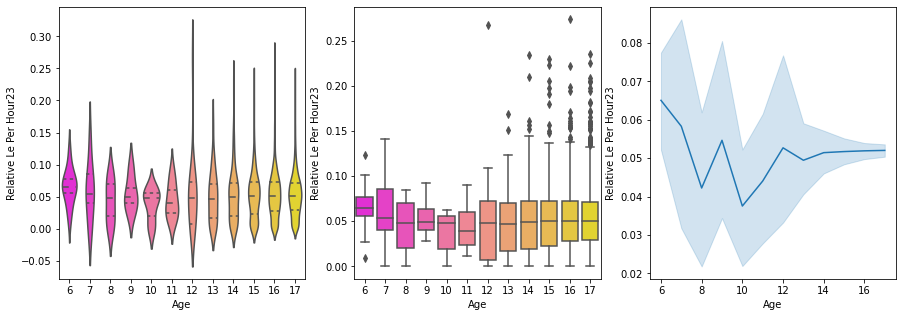

In [9]:
for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    for (x, y) in pairwise(sorted(data['Age'].unique())):
        t = stats.ttest_ind(data[data['Age'] == x][column], data[data['Age'] == y][column])
        print(str(x) + ' -> ' + str(y) + ': ' + str(t))

    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Age', y = column, inner = 'quartile', data = data, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Age', y = column, data = data, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Age', y = column, data = data, ax = axs[2], palette='spring')
    plt.show();